In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Concatenate
from tensorflow import keras
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(12)

data = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/myDataset_numerized_severity_lfc_1_DEGs_transposed.csv')


In [ ]:
data.head()

MPO       SOX8       ITGA2B  GTF2IRD1  UPP2     CEACAM21   CEACAM7  \
0   660.358182   5.584424  2058.558435  1.396106   0.0   345.536258  1.396106   
1  2329.249354   0.000000  5616.906229  2.363520   0.0   166.628188  0.000000   
2   183.042083   2.331746  1109.911227  2.331746   0.0  1046.954078  6.995239   
3   167.661469  16.409420  2352.968197  0.000000   0.0   130.561910  1.426906   
4    27.954080   0.000000  2206.042830  0.000000   0.0  1055.266528  0.000000   

        TKTL1      TEAD3      PGLYRP1  ...      FCGBP       CCL4L2  \
0   97.727427   1.396106   351.818736  ...  34.204599    30.016281   
1  100.449617   4.727041  1403.931117  ...  66.178571   219.807397   
2   90.938105   9.326985   741.495316  ...  13.990478    32.644448   
3  267.544898   2.853812   191.205421  ...  48.514808  1334.870678   
4   67.555694  12.812287   384.368603  ...  24.459820   100.168787   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     29.318228      1.396106  60.730615  2.094159  1.396106     3.490265   
1      7.090561      3.545281  33.089286  3.545281  7.090561     9.454082   
2     29.146828      0.000000   6.995239  0.000000  0.000000     9.326985   
3      2.853812      8.561437  64.210776  2.140359  0.000000     4.280718   
4     17.471300      2.329507  22.130314  0.000000  0.000000     0.000000   

   LOC122319436  severity  
0      2.094159         1  
1      0.000000         0  
2      1.165873         1  
3      0.000000         0  
4      2.329507         0  

[5 rows x 917 columns]

In [ ]:
data.shape

(100, 917)

In [ ]:
data.describe()

MPO        SOX8        ITGA2B    GTF2IRD1        UPP2  \
count    100.000000  100.000000    100.000000  100.000000  100.000000   
mean    1474.638967    7.560003   4296.951205    1.866866    1.317470   
std     2514.960762    9.030416   4563.561548    2.613095    1.948101   
min       27.954080    0.000000    350.056015    0.000000    0.000000   
25%      194.522749    1.746612   1830.728523    0.000000    0.000000   
50%      470.944280    4.773728   2643.789370    1.263120    0.000000   
75%     1306.400249   10.645116   4980.884567    2.618243    1.940830   
max    11774.750235   40.267815  24396.170364   15.561839    9.521878   

          CEACAM21     CEACAM7       TKTL1       TEAD3       PGLYRP1  ...  \
count   100.000000  100.000000  100.000000  100.000000    100.000000  ...   
mean    691.606603    2.950303  108.826201   15.342724   2249.137743  ...   
std     560.173684    4.365106   99.725615   17.089881   4720.518624  ...   
min      71.378151    0.000000    6.780800    0.000000     19.334993  ...   
25%     362.831877    0.000000   40.957847    4.303785    471.009770  ...   
50%     510.096577    1.774268   88.245615   10.042131    896.278839  ...   
75%     802.375301    3.636158  128.137173   18.563572   2066.396958  ...   
max    3517.133187   24.377153  601.782233   96.014451  38206.182580  ...   

            FCGBP       CCL4L2  LOC102723475  LOC102723996        NEFL  \
count  100.000000   100.000000    100.000000    100.000000  100.000000   
mean    49.891169   345.191445     34.348955      4.110829   35.156570   
std     87.641799   570.291461     42.727626      5.396937   46.590146   
min      0.000000     9.466536      0.000000      0.000000    0.000000   
25%     10.767208    78.772966      5.798238      0.786455    6.983658   
50%     24.062835   157.085104     18.705264      2.607055   20.521218   
75%     53.257240   309.071224     48.869973      5.234390   35.930803   
max    626.289293  3556.991862    220.832893     28.532542  265.232549   

            TEX52      PRRT1B  SEPT5.GP1BB  LOC122319436    severity  
count  100.000000  100.000000   100.000000    100.000000  100.000000  
mean     1.758777    1.732514     9.865848      2.785744    0.490000  
std      2.152300    2.553802    12.548067      7.196182    0.502418  
min      0.000000    0.000000     0.000000      0.000000    0.000000  
25%      0.000000    0.000000     2.650565      0.000000    0.000000  
50%      1.185285    0.861850     6.280141      0.000000    0.000000  
75%      2.610074    2.358932    10.831215      2.891139    1.000000  
max     10.440847   13.288830    73.070669     51.075939    1.000000  

[8 rows x 917 columns]

In [ ]:
for item in data.columns:
  values =data[item].value_counts()
  print(values)

Streaming output truncated to the last 5000 lines.
2.799143       1
23.190276      1
0.831150       1
8.693861       1
16.954785      1
7.677965       1
3.398285       1
1.324384       1
2.091728       1
15.773778      1
3.989381       1
2.135150       1
8.925754       1
4.643267       1
Name: count, dtype: int64
PRSS27
0.000000     5
3.490265     1
7.913984     1
9.964182     1
5.355297     1
            ..
6.649203     1
9.276110     1
5.068324     1
10.050786    1
24.377153    1
Name: count, Length: 96, dtype: int64
RSPH9
62.824774     1
83.728026     1
107.105946    1
48.665971     1
28.701209     1
             ..
121.639777    1
35.177752     1
79.775581     1
80.935967     1
319.224620    1
Name: count, Length: 100, dtype: int64
CARNS1
25.129910    1
46.916566    1
46.412577    1
36.278269    1
66.286126    1
            ..
24.074539    1
53.604194    1
12.596144    1
35.707044    1
17.412252    1
Name: count, Length: 100, dtype: int64
MUCL1
0.000000     66
0.808496      1
14.46

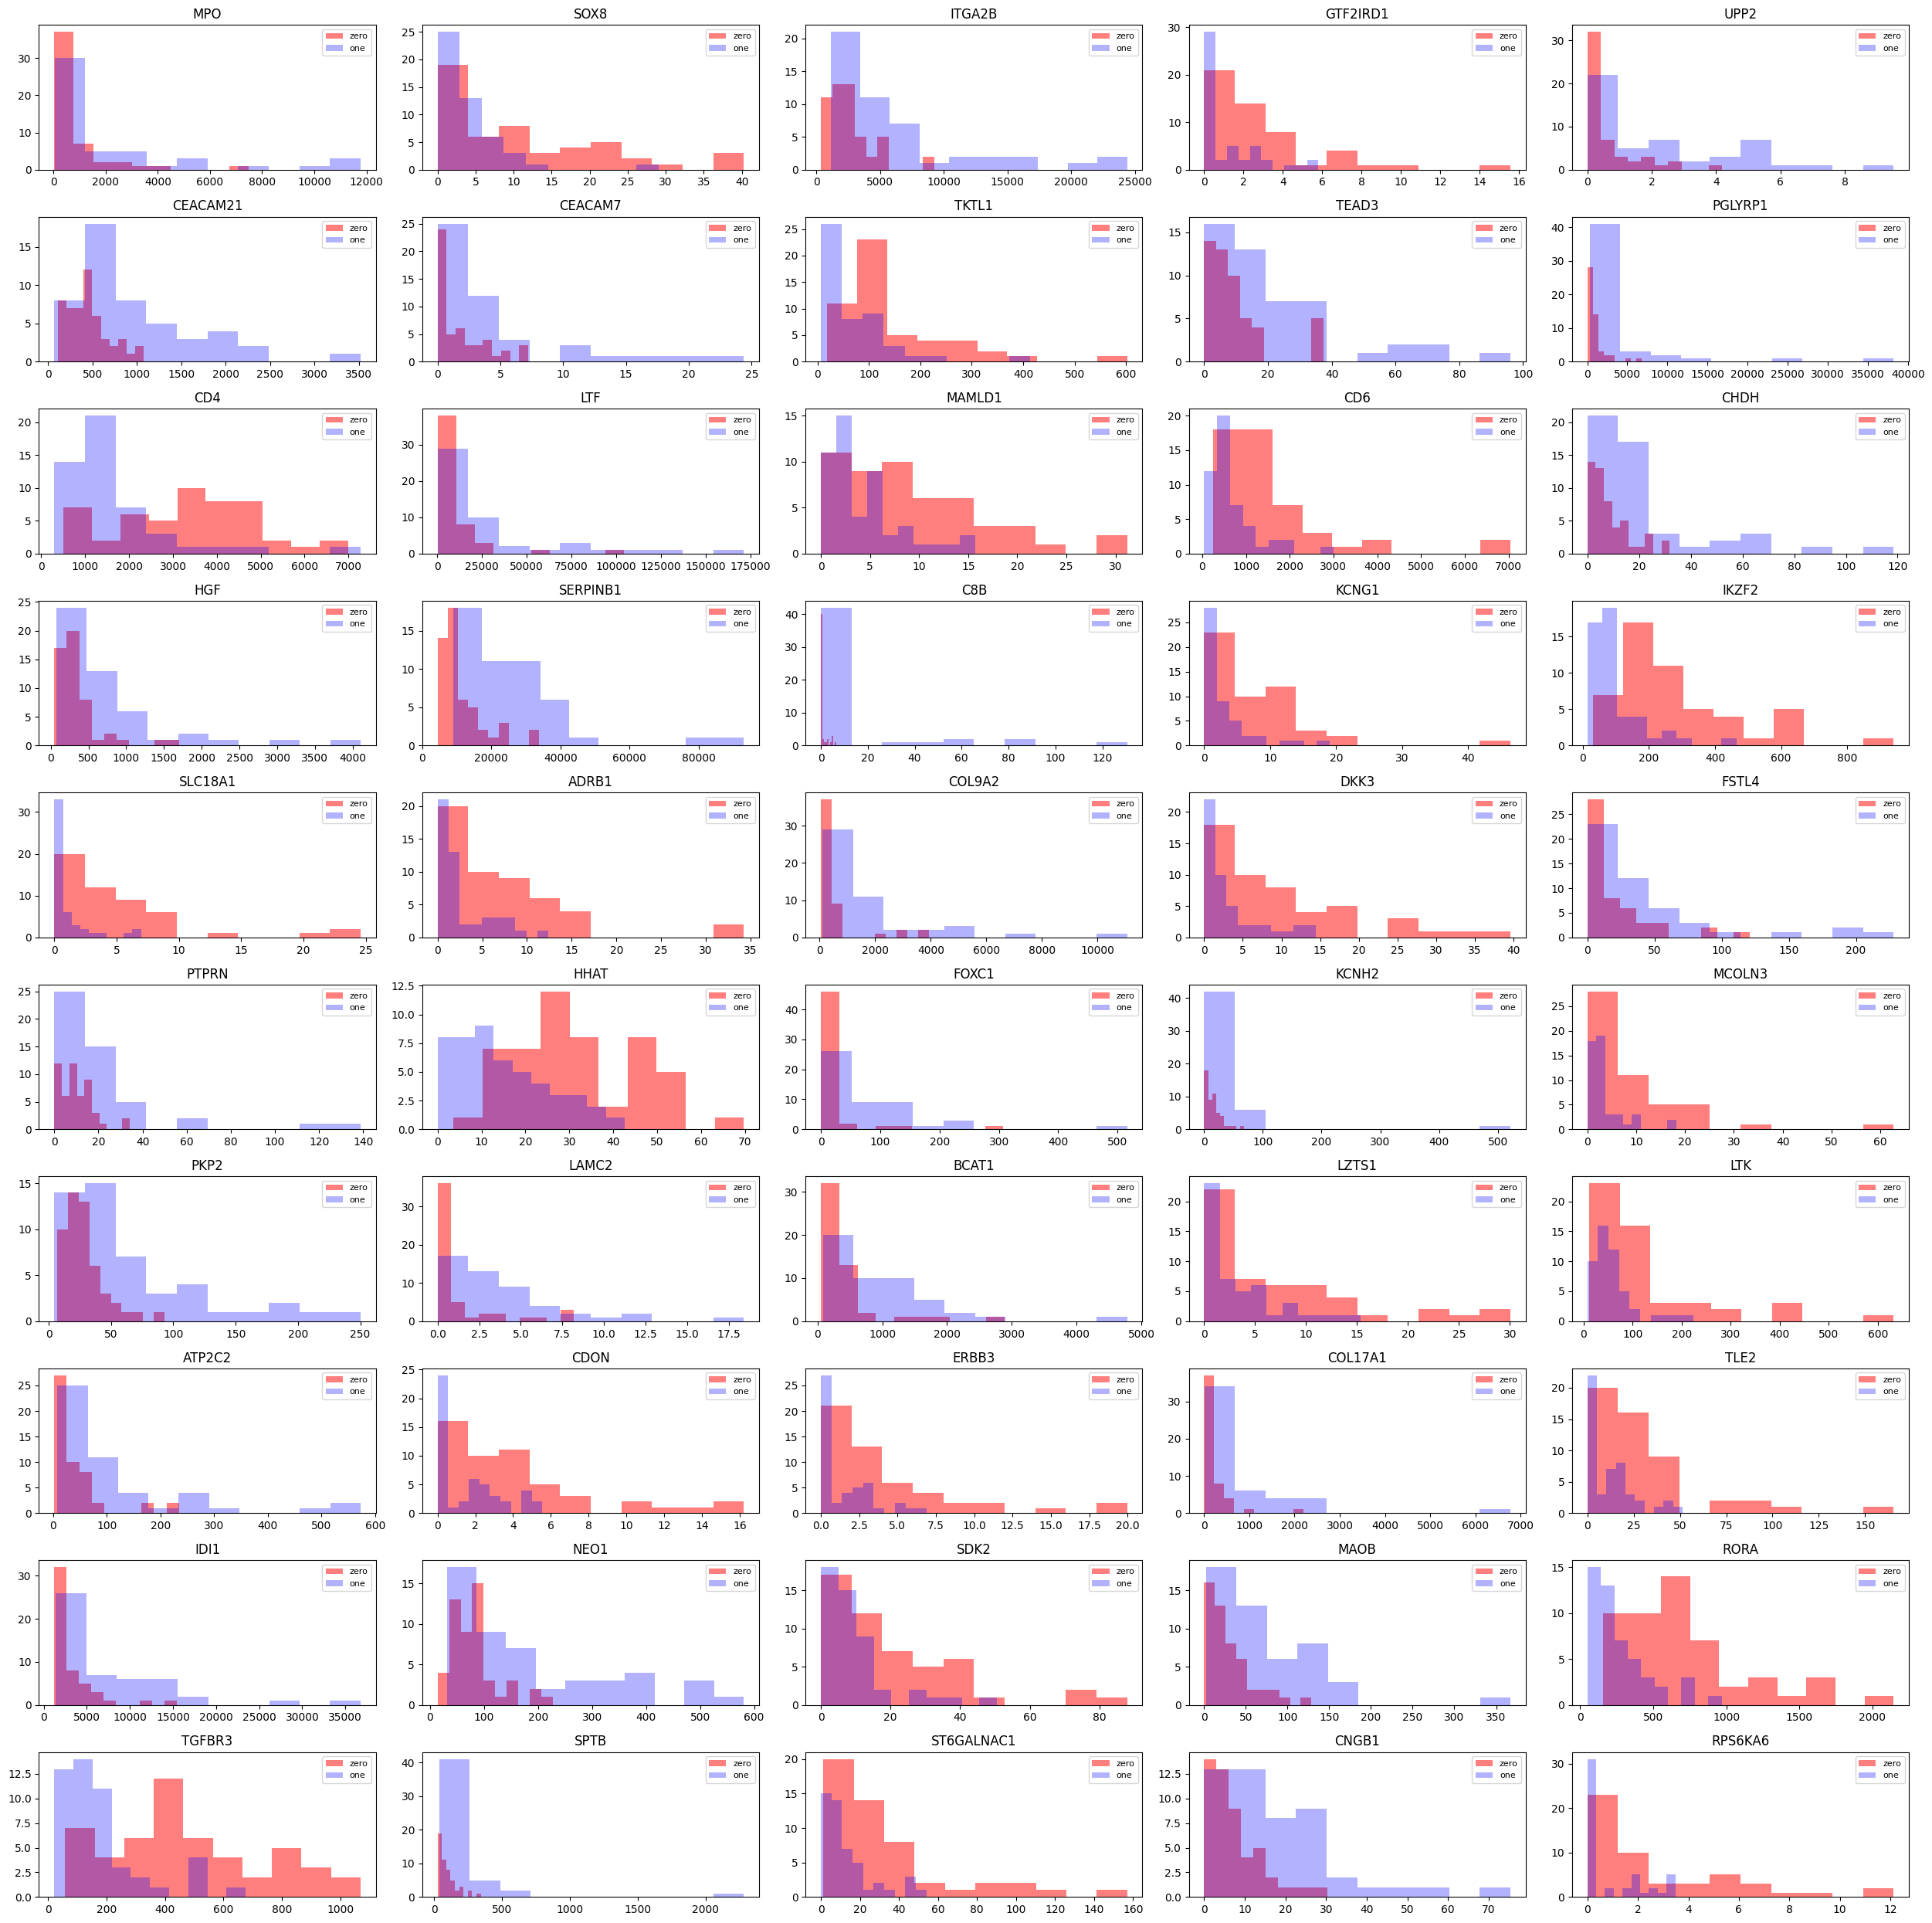

In [ ]:
#dataset exploration
import numpy as np
import matplotlib.pyplot as plt
_, axes = plt.subplots(10,5, figsize=(25, 25))
zero = data[data['severity'] ==0]
one = data[data['severity'] ==1]

ax = axes.ravel()
for i in range(50):
    bins = 10
    #---plot histogram for each of the 60 features using 10 bins---
    ax[i].hist(zero.iloc[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(one.iloc[:,i], bins=bins, color='b', alpha=0.3)
    ax[i].set_title(data.columns[i], fontsize=12)
    ax[i].legend(['zero','one'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:

y_train = data.iloc[:, -1].values

X_train = data.iloc[:, :-1].values

In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

scalar.fit(X_train)

scaled_data = scalar.transform(X_train)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

0         1         2         3    4         5         6         7    \
0  0.053836  0.138682  0.071051  0.089713  0.0  0.079564  0.057271  0.152851   
1  0.195908  0.000000  0.219031  0.151879  0.0  0.027643  0.000000  0.157426   
2  0.013203  0.057906  0.031600  0.149837  0.0  0.283124  0.286959  0.141441   
3  0.011893  0.407507  0.083295  0.000000  0.0  0.017176  0.058535  0.438258   
4  0.000000  0.000000  0.077184  0.000000  0.0  0.285536  0.000000  0.102142   

        8         9    ...       906       907       908       909       910  \
0  0.014541  0.008707  ...  0.129924  0.054615  0.005793  0.132762  0.048930   
1  0.049233  0.036258  ...  0.279940  0.105668  0.059292  0.032108  0.124254   
2  0.097141  0.018911  ...  0.118361  0.022339  0.006534  0.131986  0.000000   
3  0.029723  0.004501  ...  0.446657  0.077464  0.373614  0.012923  0.300059   
4  0.133441  0.009559  ...  0.216787  0.039055  0.025568  0.079115  0.081644   

        911       912       913       914       915  
0  0.228971  0.200574  0.105059  0.047766  0.041001  
1  0.124756  0.339559  0.533573  0.129383  0.000000  
2  0.026374  0.000000  0.000000  0.127643  0.022826  
3  0.242092  0.204999  0.000000  0.058583  0.000000  
4  0.083437  0.000000  0.000000  0.000000  0.045609  

[5 rows x 916 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

#Applying PCA
#Taking different no. of Principal Components and evaluating them, then choose the one that gives the best accuray
components = [10]#[1,10,20,30,40,60,80]#[10]#[1,10,20][20]#[10]#
for component in components:
  pca = PCA(n_components = component)
  pca.fit(scaled_data)
  data_pca = pca.transform(scaled_data)
  columns = ["PC"+str(item) for item in range(1,component+1)]
  data_pca = pd.DataFrame(data_pca,columns=columns)
  #data_pca.head()

  X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(data_pca, y_train, test_size=0.20, random_state=42)

  clf_true = RandomForestClassifier(n_estimators=1000)
  clf_true.fit(X_true_train,y_true_train)
  y_true_pred=clf_true.predict(X_true_test)
  '''
  from sklearn.svm import SVC


  clf_true = SVC(C=0.8, kernel='sigmoid')  # Use SVM classifier 'poly', 'rbf', 'linear', 'precomputed', 'sigmoid'
  clf_true.fit(X_true_train, y_true_train)
  y_true_pred = clf_true.predict(X_true_test)

  '''
  print("Base Accuracy:", metrics.accuracy_score(y_true_test, y_true_pred))
  print("Base classification report:", metrics.classification_report(y_true_test, y_true_pred))

  print("Base Accuracy_{} :".format(component),metrics.accuracy_score(y_true_test, y_true_pred))
  print("Base classification report {} :".format(component),metrics.classification_report(y_true_test, y_true_pred))



Base Accuracy: 0.75
Base classification report:               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.62      0.71      0.67         7

    accuracy                           0.75        20
   macro avg       0.73      0.74      0.73        20
weighted avg       0.76      0.75      0.75        20

Base Accuracy_10 : 0.75
Base classification report 10 :               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.62      0.71      0.67         7

    accuracy                           0.75        20
   macro avg       0.73      0.74      0.73        20
weighted avg       0.76      0.75      0.75        20



In [ ]:
data_pca2 = data_pca.copy()
data_pca2["severity"]= y_train
data_pca2.to_csv("/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_data_pca_all.csv")

In [5]:
#please note that some duplicates were added on purpose to execute some cells independently
data_pca2 = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_data_pca_all.csv', index_col=0)


In [6]:
data_pca2.shape

(100, 11)

In [7]:
data_pca2 = pd.DataFrame(data_pca2)
data_pca2.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.437760  0.232589 -1.874819 -0.384556  0.261053 -0.186990 -0.349401   
1  1.583188  0.659495 -0.955866 -0.774664 -0.233519  0.032474  0.025343   
2 -1.670227  0.034445 -1.667102  0.542413  0.316355 -0.120184 -0.281103   
3  4.433042 -0.343683  0.002343 -0.642394  0.046507  0.355556 -0.235854   
4 -0.451509 -0.561932 -1.057832 -0.047581  1.532729  0.245727 -0.023098   

        PC8       PC9      PC10  severity  
0 -0.503224  0.377283  0.851362         1  
1  0.103382 -0.308444  0.652495         0  
2 -0.330050  0.365736 -0.230318         1  
3  0.929836 -0.936084  1.008100         0  
4 -0.140392  0.479997 -0.709471         0

In [ ]:
y = data_pca2.iloc[:, -1].values
X = data_pca2.iloc[:, :-1].values

In [ ]:
X = pd.DataFrame(X)
X.head()

0         1         2         3         4         5         6  \
0  1.437760  0.232589 -1.874819 -0.384556  0.261053 -0.186990 -0.349401   
1  1.583188  0.659495 -0.955866 -0.774664 -0.233519  0.032474  0.025343   
2 -1.670227  0.034445 -1.667102  0.542413  0.316355 -0.120184 -0.281103   
3  4.433042 -0.343683  0.002343 -0.642394  0.046507  0.355556 -0.235854   
4 -0.451509 -0.561932 -1.057832 -0.047581  1.532729  0.245727 -0.023098   

          7         8         9  
0 -0.503224  0.377283  0.851362  
1  0.103382 -0.308444  0.652495  
2 -0.330050  0.365736 -0.230318  
3  0.929836 -0.936084  1.008100  
4 -0.140392  0.479997 -0.709471

In [ ]:
#reimporting for cell inddependent execution
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#generator 
def build_generator():
    noise_input = Input(shape=(10,))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    inputs = Concatenate()([noise_input, label_input])
    model = Dense(1024, input_dim=11)(inputs)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dense(1024)(model)
    model = LeakyReLU(alpha=0.2)(model)
    gen_data = Dense(X_true_train.shape[1], activation='linear')(model)
    return Model([noise_input, label_input], gen_data)

# discriminator 
def build_discriminator():
    data_input = Input(shape=(X_true_train.shape[1],))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    inputs = Concatenate()([data_input, label_input])
    model = Dense(1024, input_dim=X_true_train.shape[1] + 1)(inputs)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dense(1024)(model)
    model = LeakyReLU(alpha=0.2)(model)
    #validity = Dense(1)(model)  # Linear activation for WGAN-GP by default
    validity = Dense(1, activation='sigmoid')(model)

    return Model([data_input, label_input], validity)

# cWGAN-GP model
def build_cwgan(generator, discriminator):
    noise_input = Input(shape=(10,))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    gen_data = generator([noise_input, label_input])
    cgan_output = discriminator([gen_data, label_input])
    return Model([noise_input, label_input], cgan_output)

def wasserstein_loss(y_true, y_pred):
    return -tf.reduce_mean(y_true * y_pred)

def gradient_penalty_loss(y_true, y_pred, averaged_samples, penalty_weight=10):
    gradients = tf.gradients(y_pred, averaged_samples)[0]
    gradients_sqr = tf.square(gradients)
    gradient_penalty = tf.reduce_mean(gradients_sqr)
    return penalty_weight * gradient_penalty

# training loop
def train_cwgan(generator, discriminator, cgan, x_train, y_train, epochs=5000, batch_size=64):
    d_history = []
    g_history = []

    for epoch in range(epochs):
        for _ in range(5):
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            real_data = x_train.iloc[idx]
            labels = pd.DataFrame(y_train).iloc[idx]

            noise = np.random.normal(0, 1, (batch_size, 10))

            gen_data = generator.predict([noise, labels])

            epsilon = np.random.uniform(0, 1, (batch_size, 1))
            averaged_samples = epsilon * real_data + (1 - epsilon) * gen_data

            # Training the discriminator with GP
            d_loss_real = discriminator.train_on_batch([real_data, labels], -np.ones((batch_size, 1)))
            d_loss_fake = discriminator.train_on_batch([gen_data, labels], np.ones((batch_size, 1)))
            d_loss_gp = discriminator.train_on_batch([averaged_samples, labels], np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, 0.5 * np.add(d_loss_fake, d_loss_gp))

        # Training the generator
        noise = np.random.normal(0, 1, (batch_size, 10))
        labels = np.random.randint(0, 2, (batch_size, 1))
        g_loss = cgan.train_on_batch([noise, labels], -np.ones((batch_size, 1)))

        # Printing the progress
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Discriminator Loss: {d_loss} | Generator Loss: {g_loss}")

        d_history.append(d_loss)
        g_history.append(g_loss)

    plot_history(d_history, g_history)

    generator.save('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_trained_generated_model_5_all.h5')

# # create a line plot of loss for the gan and save to file
# def plot_history_(d_hist, g_hist):
#     # plot loss
#     plt.subplot(1, 1, 1)
#     plt.plot(d_hist, label='d')
#     plt.plot(g_hist, label='gen')
#     plt.show()
    # plt.close()

def plot_history(d_hist, g_hist):
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='Disc')
    plt.plot(g_hist, label='Gen')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.close()

def generate_data(generator, num_samples, label):
    noise = np.random.normal(0, 1, (num_samples, 10))
    #noise = noise * std.to_numpy() + mean.to_numpy()
    labels = np.ones((num_samples, 1)) * label
    gen_data = generator.predict([noise, labels])
    gen_data_with_labels = np.concatenate((gen_data, labels), axis=1)
    return gen_data_with_labels


def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)


In [ ]:
# models biolding and compilation

generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(loss=wasserstein_loss, optimizer=Adam(0.00001))
cwgan = build_cwgan(generator, discriminator)
cwgan.compile(loss=wasserstein_loss, optimizer=Adam(0.00001))

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 11ms/step
Epoch: 4000 | Discriminator Loss: -0.0392703115940094 | Generator Loss: 0.6889019012451172
2/2 [==============================] - 0s 17ms/step


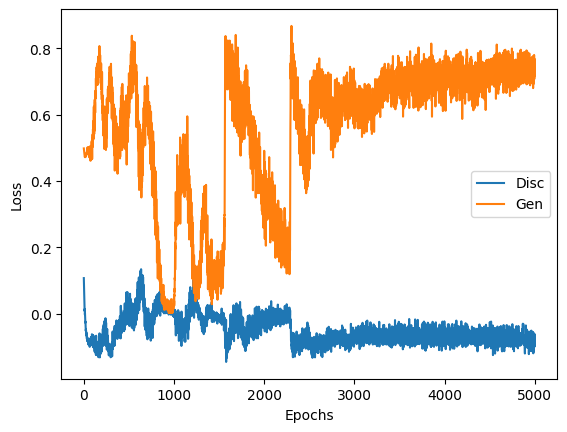

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Training cWGAN-GP
train_cwgan(generator, discriminator, cwgan, X, y, epochs=5000, batch_size=64)

In [ ]:
from keras.models import load_model
generator = load_model('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_trained_generated_model_5_all.h5')

In [ ]:
#generate 5000 samples for class  1

num_samples = 5000
class_label = 1

synthetic_data_normalized = generate_data(generator, num_samples, class_label)

save_to_csv(synthetic_data_normalized, '/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_generated_data__class1_all.csv')

157/157 [==============================] - 1s 6ms/step


In [ ]:
#generate 5000 samples for class  0
num_samples = 5000
class_label = 0

synthetic_data_normalized = generate_data(generator, num_samples, class_label)

save_to_csv(synthetic_data_normalized, '/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_generated_data__class0_all.csv')

157/157 [==============================] - 1s 4ms/step


In [8]:
#merge the two synthetic datasets (for class 1 and 0)

class1 = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_generated_data__class1_all.csv')
class0 = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_generated_data__class0_all.csv')


class1.head()

0         1         2         3         4         5         6  \
0 -0.021550  0.355653 -0.238895  0.632786 -0.377388  0.313033 -0.249118   
1 -2.196481  0.560226 -0.059322 -0.495902  0.023720  0.512499  0.163179   
2 -0.780336  0.669040 -0.817377  0.698805 -0.346104  1.156735  0.106718   
3  0.996417  0.425627 -1.237560 -0.040864 -0.319565  0.579317  0.414589   
4  0.146711  0.232480 -0.500847 -0.149439 -0.188114  0.542194 -0.510892   

          7         8         9   10  
0 -0.772856  0.542137 -0.352158  1.0  
1 -0.384954  0.041662 -0.504463  1.0  
2 -0.245393 -0.014895  0.149302  1.0  
3  0.260475 -0.578062  0.231405  1.0  
4 -0.672499  0.047457 -0.055570  1.0

In [9]:
#merge the two dataset into a single one
# Append the DataFrames vertically
combined_df = pd.concat([class1, class0], ignore_index=True)

combined_df.to_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_generated_data_combined_classes_all.csv', index=False)

combined_df.columns = data_pca2.columns

combined_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.021550  0.355653 -0.238895  0.632786 -0.377388  0.313033 -0.249118   
1 -2.196481  0.560226 -0.059322 -0.495902  0.023720  0.512499  0.163179   
2 -0.780336  0.669040 -0.817377  0.698805 -0.346104  1.156735  0.106718   
3  0.996417  0.425627 -1.237560 -0.040864 -0.319565  0.579317  0.414589   
4  0.146711  0.232480 -0.500847 -0.149439 -0.188114  0.542194 -0.510892   

        PC8       PC9      PC10  severity  
0 -0.772856  0.542137 -0.352158       1.0  
1 -0.384954  0.041662 -0.504463       1.0  
2 -0.245393 -0.014895  0.149302       1.0  
3  0.260475 -0.578062  0.231405       1.0  
4 -0.672499  0.047457 -0.055570       1.0

In [10]:
combined_df = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_generated_data_combined_classes_all.csv')
combined_df.shape

(10000, 11)

In [ ]:
data_gen = combined_df.iloc[:, :-1].values
data_gen

array([[-0.02155025,  0.35565281, -0.23889542, ..., -0.77285606,
         0.54213744, -0.35215825],
       [-2.19648147,  0.56022626, -0.05932205, ..., -0.38495386,
         0.0416618 , -0.50446337],
       [-0.78033578,  0.66904008, -0.81737715, ..., -0.24539319,
        -0.0148951 ,  0.14930159],
       ...,
       [-3.73376894, -2.76177049,  1.48948967, ...,  0.46692488,
        -0.11209726,  0.24639459],
       [ 1.61877775,  0.65731472, -1.23580301, ..., -0.20648995,
         0.31811592,  0.40147188],
       [-0.08163857,  0.36050418, -0.59792566, ...,  0.00426173,
         0.12333758,  0.16912353]])

In [ ]:
data_gen = pd.DataFrame(data_gen)
data_gen.head()

0         1         2         3         4         5         6  \
0 -0.021550  0.355653 -0.238895  0.632786 -0.377388  0.313033 -0.249118   
1 -2.196481  0.560226 -0.059322 -0.495902  0.023720  0.512499  0.163179   
2 -0.780336  0.669040 -0.817377  0.698805 -0.346104  1.156735  0.106718   
3  0.996417  0.425627 -1.237560 -0.040864 -0.319565  0.579317  0.414589   
4  0.146711  0.232480 -0.500847 -0.149439 -0.188114  0.542194 -0.510892   

          7         8         9  
0 -0.772856  0.542137 -0.352158  
1 -0.384954  0.041662 -0.504463  
2 -0.245393 -0.014895  0.149302  
3  0.260475 -0.578062  0.231405  
4 -0.672499  0.047457 -0.055570

In [ ]:
df_orig = pca.inverse_transform(data_gen)
df_or = pd.DataFrame(df_orig)
df_or.head()
df_o =scalar.inverse_transform(df_or)
df_back =pd.DataFrame(df_o)
df_back["severity"] = combined_df.iloc[:, -1]
df_back.to_csv("/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_data_gen_all.csv",index=False)
df_back.head()

0          1            2         3         4            5  \
0  1624.082943  10.608924  6428.431896  1.630199  1.763121   744.758945   
1  2823.724537   4.099945  4495.135457  0.725285  2.217016  1056.350360   
2  1508.911392  10.601788  4834.032233  1.678662  1.668489   682.235065   
3  1101.656104   8.880627  1264.517053  1.876254  1.102313   424.695543   
4  1945.376273   7.544294  4660.466243  1.730462  1.789161   663.021439   

          6          7          8            9  ...        907         908  \
0  4.466022  91.879056  16.278422  1265.117907  ...  71.191604  136.345863   
1  4.391488  44.682994  20.748742  4041.694360  ...  23.958679  221.459177   
2  4.171605  59.453893  18.100810  2235.614802  ...  54.035606  217.698267   
3  2.058796  99.704297  11.361143  1452.373408  ...  52.206593  390.986231   
4  4.737796  88.742759  17.020479  1639.473771  ...  19.579273  133.729645   

         909       910        911       912       913        914       915  \
0  29.027792  4.750905  41.320749  1.442332  2.214200   7.160739  3.437986   
1  41.837240  1.942504  23.391371  1.125069  1.941547  15.713495  4.442126   
2  36.530779  5.455581  42.653674  1.778859  2.732775   7.606429  1.913640   
3  19.504456  5.306933  41.685793  2.404711  1.937864   6.943547 -0.961444   
4  29.603295  2.917626  50.213297  2.224949  2.551372   7.925679  3.706654   

   severity  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  

[5 rows x 917 columns]

In [ ]:
!pip install table_evaluator

In [ ]:
from table_evaluator import *

In [11]:

real = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/myDataset_numerized_severity_lfc_1_DEGs_transposed.csv')
fake = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_data_gen_all.csv')

fake.columns = real.columns

fake.head()

MPO       SOX8       ITGA2B  GTF2IRD1      UPP2     CEACAM21  \
0  1624.082943  10.608924  6428.431896  1.630199  1.763121   744.758945   
1  2823.724537   4.099945  4495.135457  0.725285  2.217016  1056.350360   
2  1508.911392  10.601788  4834.032233  1.678662  1.668489   682.235065   
3  1101.656104   8.880627  1264.517053  1.876254  1.102313   424.695543   
4  1945.376273   7.544294  4660.466243  1.730462  1.789161   663.021439   

    CEACAM7      TKTL1      TEAD3      PGLYRP1  ...      FCGBP      CCL4L2  \
0  4.466022  91.879056  16.278422  1265.117907  ...  71.191604  136.345863   
1  4.391488  44.682994  20.748742  4041.694360  ...  23.958679  221.459177   
2  4.171605  59.453893  18.100810  2235.614802  ...  54.035606  217.698267   
3  2.058796  99.704297  11.361143  1452.373408  ...  52.206593  390.986231   
4  4.737796  88.742759  17.020479  1639.473771  ...  19.579273  133.729645   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     29.027792      4.750905  41.320749  1.442332  2.214200     7.160739   
1     41.837240      1.942504  23.391371  1.125069  1.941547    15.713495   
2     36.530779      5.455581  42.653674  1.778859  2.732775     7.606429   
3     19.504456      5.306933  41.685793  2.404711  1.937864     6.943547   
4     29.603295      2.917626  50.213297  2.224949  2.551372     7.925679   

   LOC122319436  severity  
0      3.437986       1.0  
1      4.442126       1.0  
2      1.913640       1.0  
3     -0.961444       1.0  
4      3.706654       1.0  

[5 rows x 917 columns]

In [12]:
real.head()

MPO       SOX8       ITGA2B  GTF2IRD1  UPP2     CEACAM21   CEACAM7  \
0   660.358182   5.584424  2058.558435  1.396106   0.0   345.536258  1.396106   
1  2329.249354   0.000000  5616.906229  2.363520   0.0   166.628188  0.000000   
2   183.042083   2.331746  1109.911227  2.331746   0.0  1046.954078  6.995239   
3   167.661469  16.409420  2352.968197  0.000000   0.0   130.561910  1.426906   
4    27.954080   0.000000  2206.042830  0.000000   0.0  1055.266528  0.000000   

        TKTL1      TEAD3      PGLYRP1  ...      FCGBP       CCL4L2  \
0   97.727427   1.396106   351.818736  ...  34.204599    30.016281   
1  100.449617   4.727041  1403.931117  ...  66.178571   219.807397   
2   90.938105   9.326985   741.495316  ...  13.990478    32.644448   
3  267.544898   2.853812   191.205421  ...  48.514808  1334.870678   
4   67.555694  12.812287   384.368603  ...  24.459820   100.168787   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     29.318228      1.396106  60.730615  2.094159  1.396106     3.490265   
1      7.090561      3.545281  33.089286  3.545281  7.090561     9.454082   
2     29.146828      0.000000   6.995239  0.000000  0.000000     9.326985   
3      2.853812      8.561437  64.210776  2.140359  0.000000     4.280718   
4     17.471300      2.329507  22.130314  0.000000  0.000000     0.000000   

   LOC122319436  severity  
0      2.094159         1  
1      0.000000         0  
2      1.165873         1  
3      0.000000         0  
4      2.329507         0  

[5 rows x 917 columns]

In [13]:
real.shape

(100, 917)

In [14]:
fake.shape

(10000, 917)

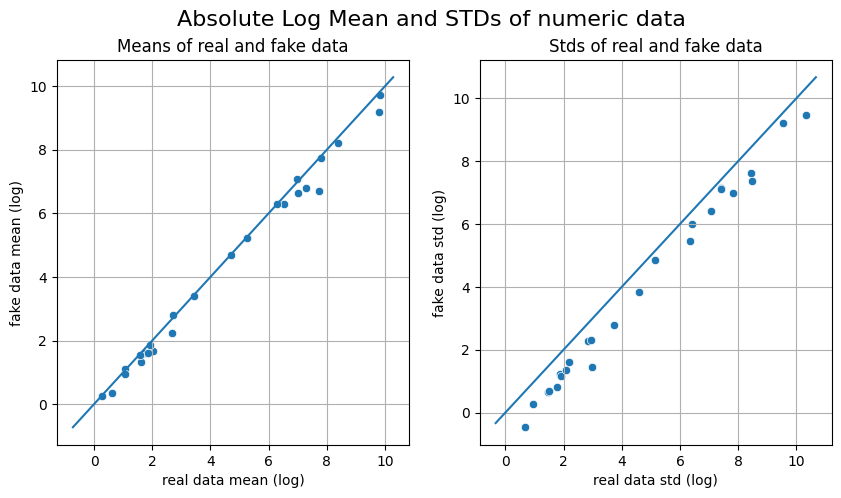

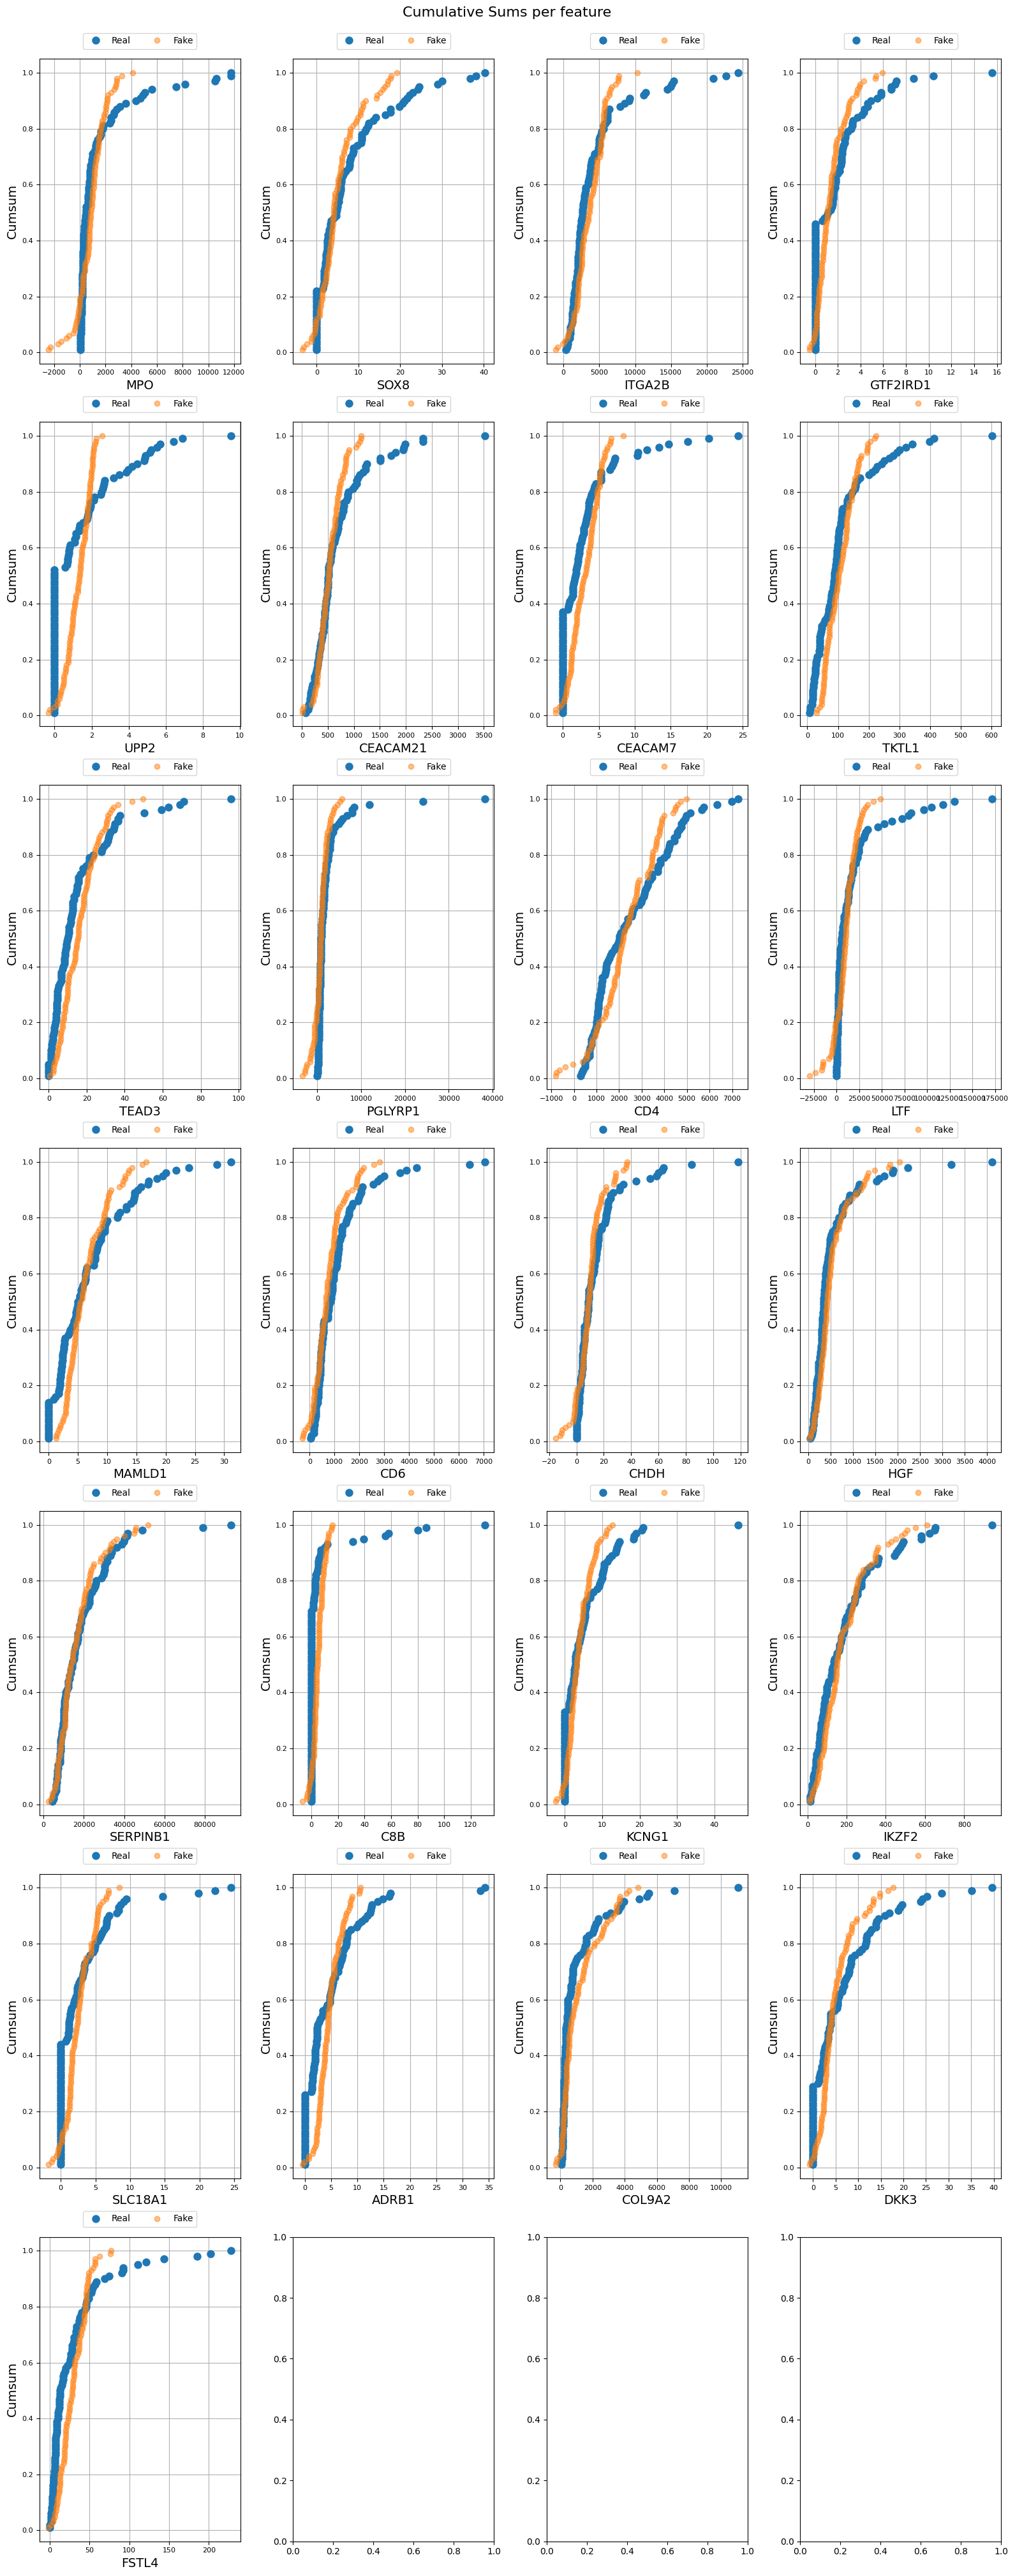

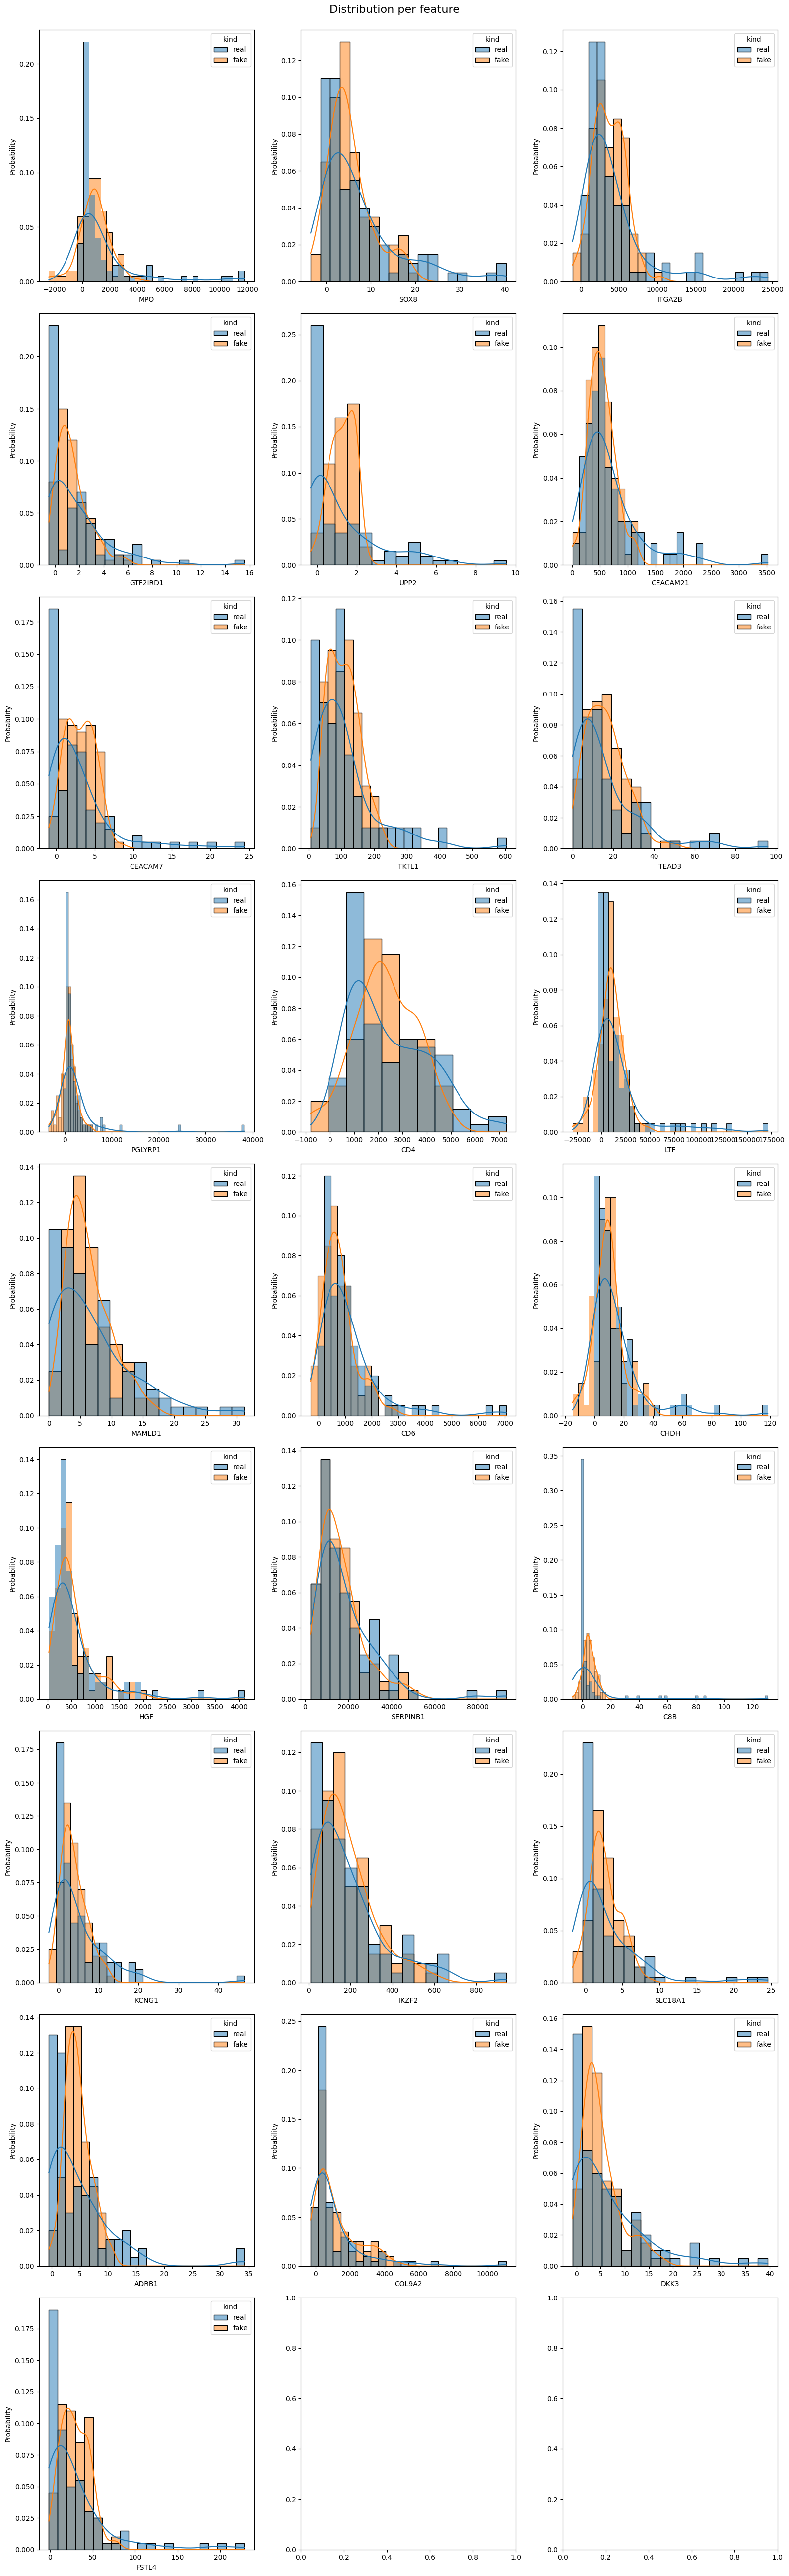

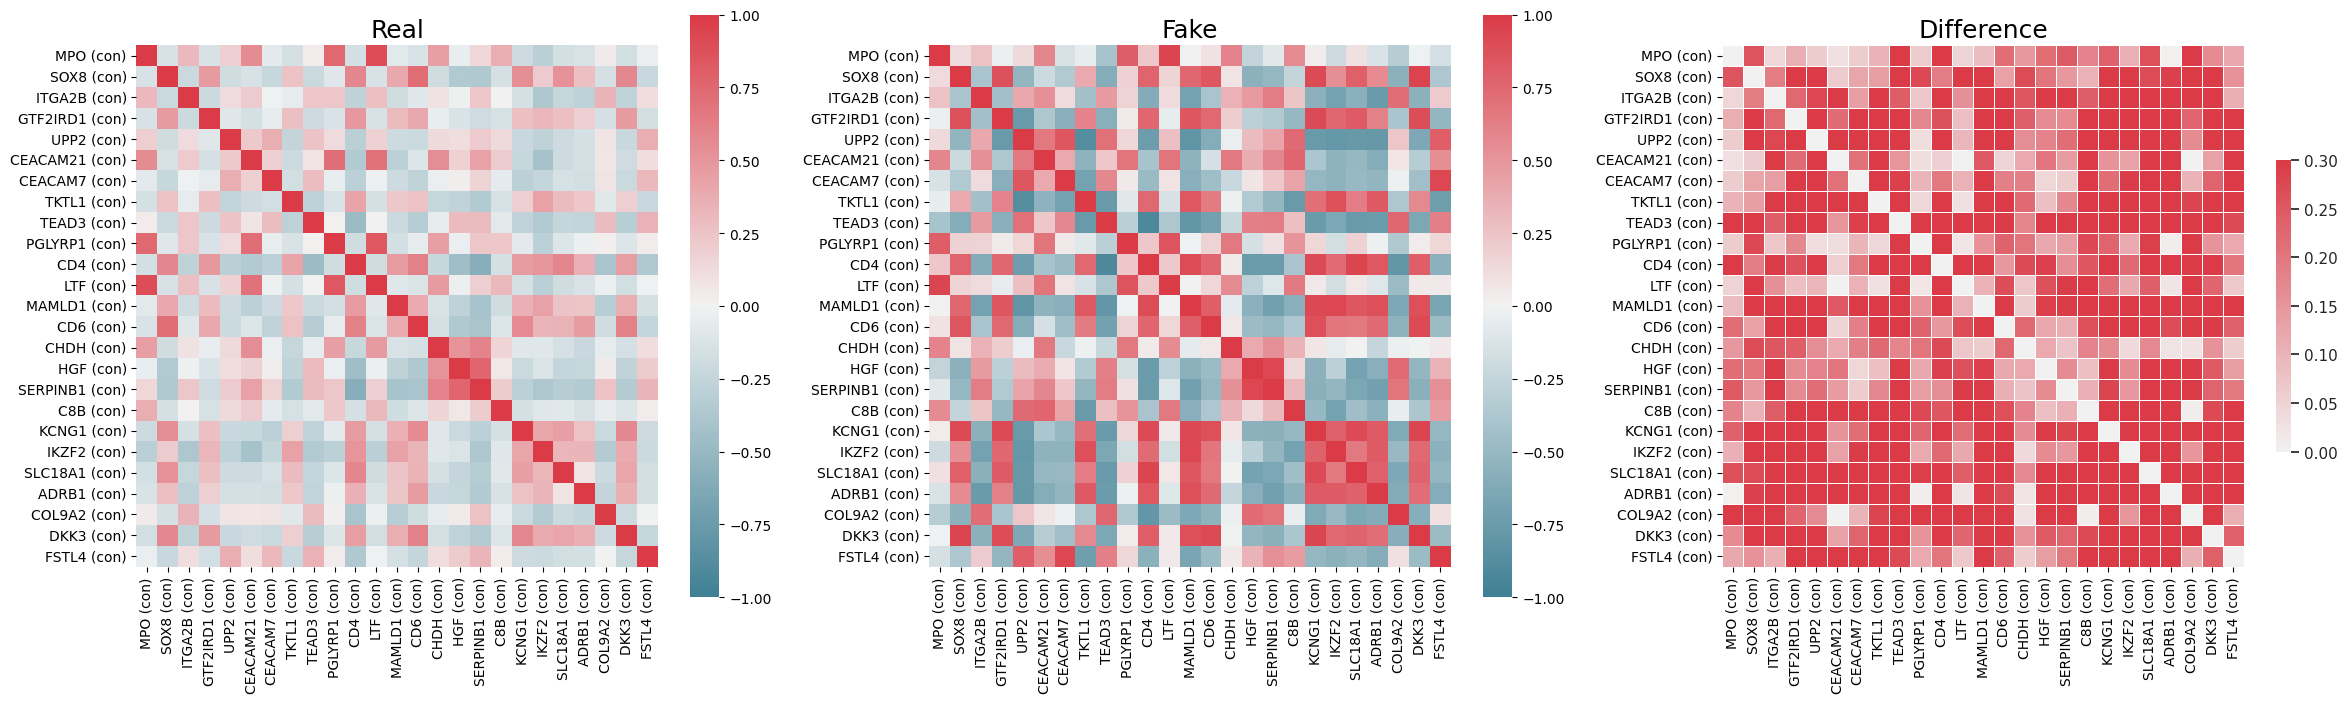

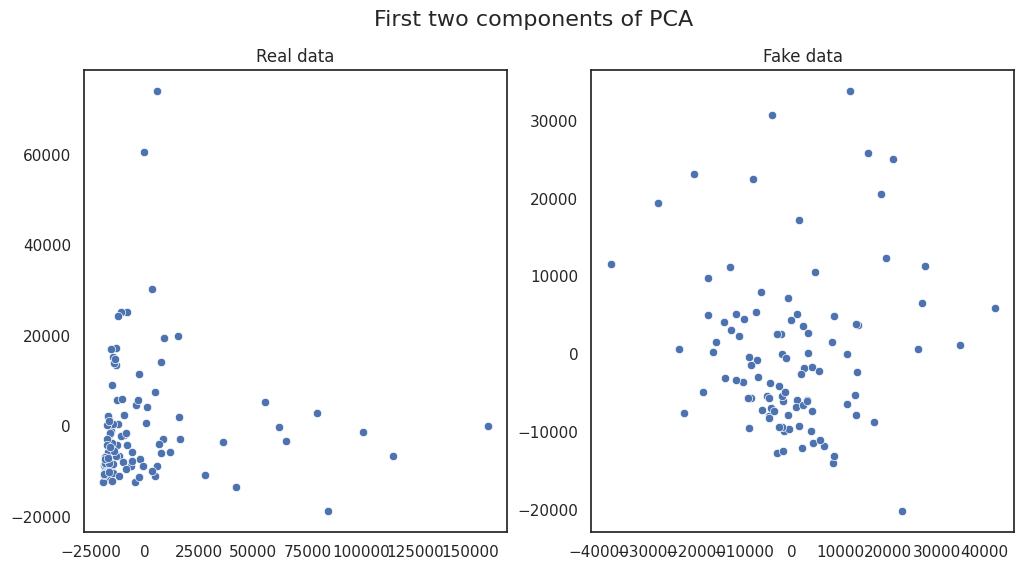

In [ ]:
# Evaluation with table_evaluation
selected_vars = fake.columns[0:25]

real_subset = real[selected_vars]
fake_subset = fake[selected_vars]


table_evaluator = TableEvaluator(real_subset, fake_subset)
table_evaluator.visual_evaluation()

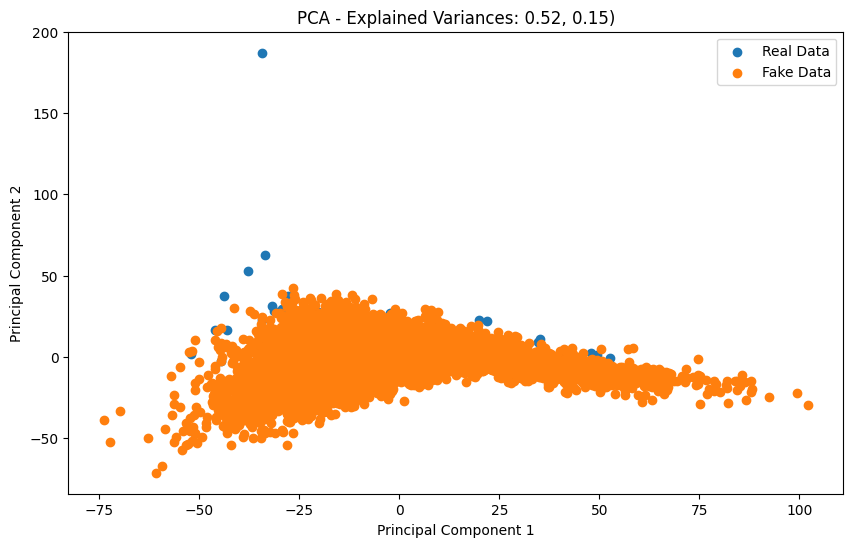

In [15]:
#import again for independent cell running
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#PCA evaluation
# Concatenate real and fake dataframes
combined_data = pd.concat([real, fake], ignore_index=True)
x_scaled = StandardScaler().fit_transform(combined_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

real_pca = pca_result[:len(real)]
fake_pca = pca_result[len(real):]


#the explained variances
explained_variances = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data')
plt.scatter(fake_pca[:, 0], fake_pca[:, 1], label='Fake Data')
plt.title('PCA - Explained Variances: {:.2f}, {:.2f})'.format(*explained_variances))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [16]:
fake["severity"].value_counts()

severity
1.0    5000
0.0    5000
Name: count, dtype: int64

In [17]:
fake.shape

(10000, 917)

In [18]:
combined_data.shape

(10100, 917)

In [ ]:
#use the combined data
y_train = combined_data.iloc[:, -1].values
X_train = combined_data.iloc[:, :-1].values

In [ ]:
X_train.shape

(10100, 916)

In [ ]:
y_train.shape

(10100,)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# RF evaluation with 5-fold cross validation
clf_true = RandomForestClassifier(n_estimators=100)

cv_scores = cross_val_score(clf_true, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

y_true_pred_cv = cross_val_predict(clf_true, X_train, y_train, cv=5)
print("Cross-Validation classification report:")
print(metrics.classification_report(y_train, y_true_pred_cv))


Cross-Validation Scores: [0.98712871 0.99554455 0.99207921 0.99405941 0.99207921]
Mean Accuracy: 0.9921782178217822
Cross-Validation classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5051
         1.0       0.99      0.99      0.99      5049

    accuracy                           0.99     10100
   macro avg       0.99      0.99      0.99     10100
weighted avg       0.99      0.99      0.99     10100



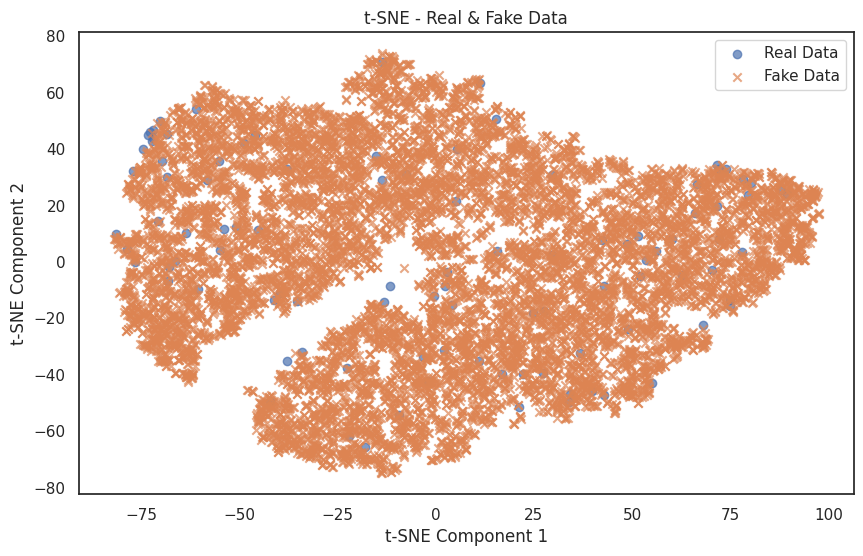

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

#using t-SNE to see if real and fake data overlap
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(x_scaled)

real_tsne = tsne_result[:len(real)]
fake_tsne = tsne_result[len(real):]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(real_tsne[:, 0], real_tsne[:, 1], label='Real Data', alpha=0.7, marker='o')
plt.scatter(fake_tsne[:, 0], fake_tsne[:, 1], label='Fake Data', alpha=0.7, marker='x')
plt.title('t-SNE - Real & Fake Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()



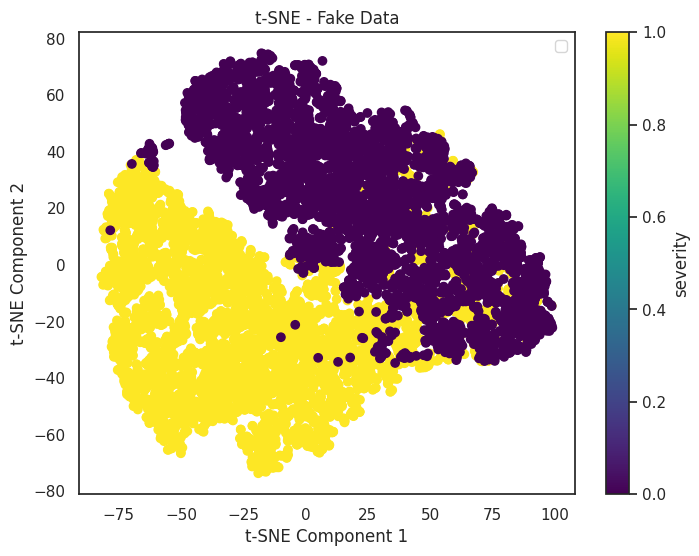

In [ ]:
#looking at the fake data
fake_data = fake.copy()
x_scaled = StandardScaler().fit_transform(fake_data.drop('severity', axis=1))

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(x_scaled)

severity_labels = fake_data['severity']

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=severity_labels, cmap='viridis', label='')
plt.title('t-SNE - Fake Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='severity')
plt.legend()
plt.show()

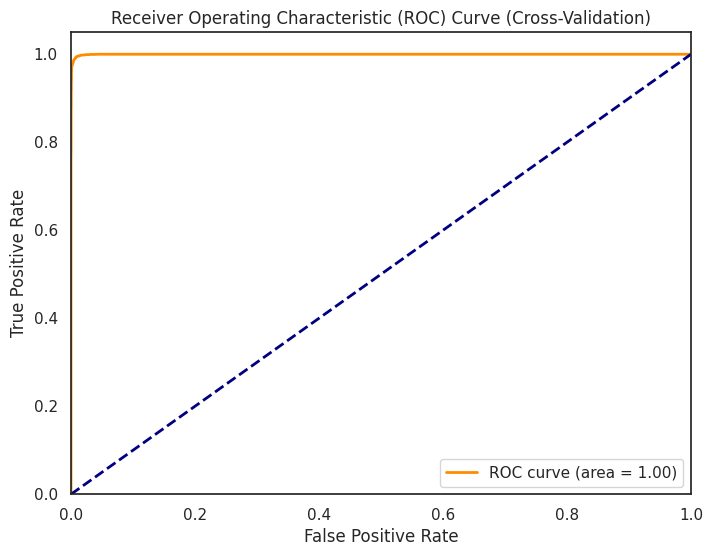

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# ROC evaluation before cosine filtering

y_true_prob_cv = cross_val_predict(clf_true, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_train, y_true_prob_cv)

roc_auc_cv = roc_auc_score(y_train, y_true_prob_cv)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#The code is designed to find and keep only the data in fake that are close to the data in real when comparing vectors within the same "severity" category. The process involves
#calculating the cosine similarity between each vector in real and its corresponding vectors in fake (belonging to the same "severity" category), and then selecting the N closest
#neighbors based on these similarity scores.
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm

def compute_cosine_similarity(vector1, vector2):
    return dot(vector1, vector2) / (norm(vector1) * norm(vector2))

#real and fake dataframes
df1 = real
df2 = fake

neighbor_vectors = []

grouped_df2 = df2.groupby('severity')

# Iterations
for _, target_vector in df1.iterrows():
    target_severity = target_vector['severity']

    group = grouped_df2.get_group(target_severity)

    target_vector_values = target_vector.drop('severity').values.reshape(1, -1)
    group_values = group.drop('severity', axis=1).values

    similarities = cosine_similarity(target_vector_values, group_values).flatten()

    # Getting the indices of N closest neighbors
    n = 5  # Number of closest neighbors to select
    closest_indices = similarities.argsort()[::-1][:n]

    closest_vectors = group.iloc[closest_indices]  # Using iloc instead of loc
    neighbor_vectors.extend(closest_vectors.values)

df_neighbors = pd.DataFrame(neighbor_vectors, columns=df2.columns)

# Remove duplicates from df_neighbors
df_neighbors = df_neighbors.drop_duplicates()

df_neighbors.to_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_fake_neighbor_vectors_all.csv', index=False)
df_neighbors.head()

MPO      SOX8       ITGA2B  GTF2IRD1      UPP2    CEACAM21  \
0   976.666713  1.031168  3858.014210 -0.071605  1.739954  557.560346   
1  1054.016764  5.434441  4939.611506  0.343269  1.587549  628.544126   
2  1058.572782  7.127720  4347.171424  1.409333  1.518649  531.141147   
3   452.712627  2.873710  2644.531669  0.829144  1.357088  478.439156   
4  1147.876928  1.219414  3692.628356  0.277615  1.476607  504.820975   

    CEACAM7       TKTL1      TEAD3     PGLYRP1  ...      FCGBP      CCL4L2  \
0  5.514711   90.046458  12.827448  298.774621  ... -16.440684 -128.243312   
1  4.652855   90.603518  10.698734  723.089954  ...  31.807837  -59.711348   
2  4.564601   79.561014  13.832924  342.511771  ...   7.529078   38.433251   
3  4.355237  135.955684  12.000176   33.766865  ...  22.207071  179.379356   
4  4.516970  118.492965  11.312703  577.597468  ...  -8.502216  -17.029835   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     28.726043      1.529843   8.355918  1.128580  2.192897     7.751700   
1     26.943560      3.775602  11.920037  0.893708  2.152086     8.098886   
2     31.801726      3.372449  42.898946  2.062610  2.106661     8.550409   
3     18.025250      1.795527  19.486226  1.454479  1.396140     4.528483   
4     23.562746      1.907895  11.271331  1.424020  2.053334     7.158690   

   LOC122319436  severity  
0      4.641520       1.0  
1      3.858044       1.0  
2      3.146285       1.0  
3      3.928436       1.0  
4      3.373665       1.0  

[5 rows x 917 columns]

In [19]:
df_neighbors = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/cwgan_beta_severity_lfc_1_nosm_fake_neighbor_vectors_all.csv')


In [20]:
df_neighbors.shape

(463, 917)

In [21]:
fake=df_neighbors

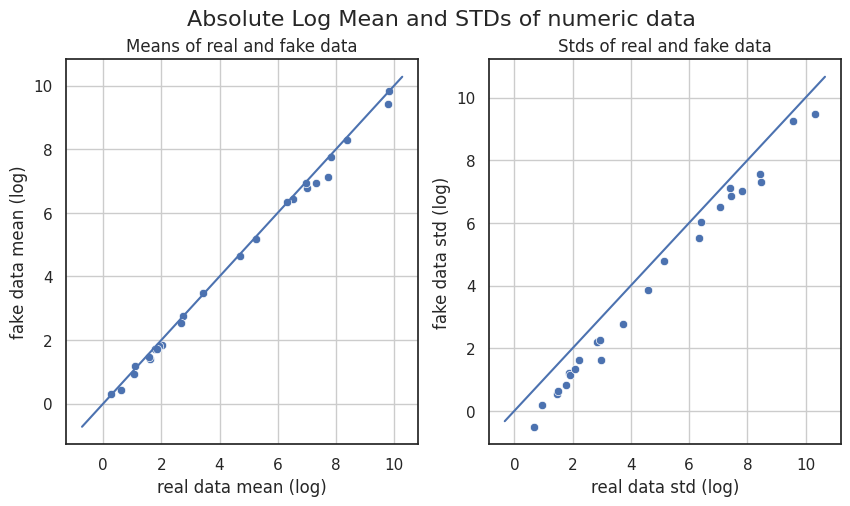

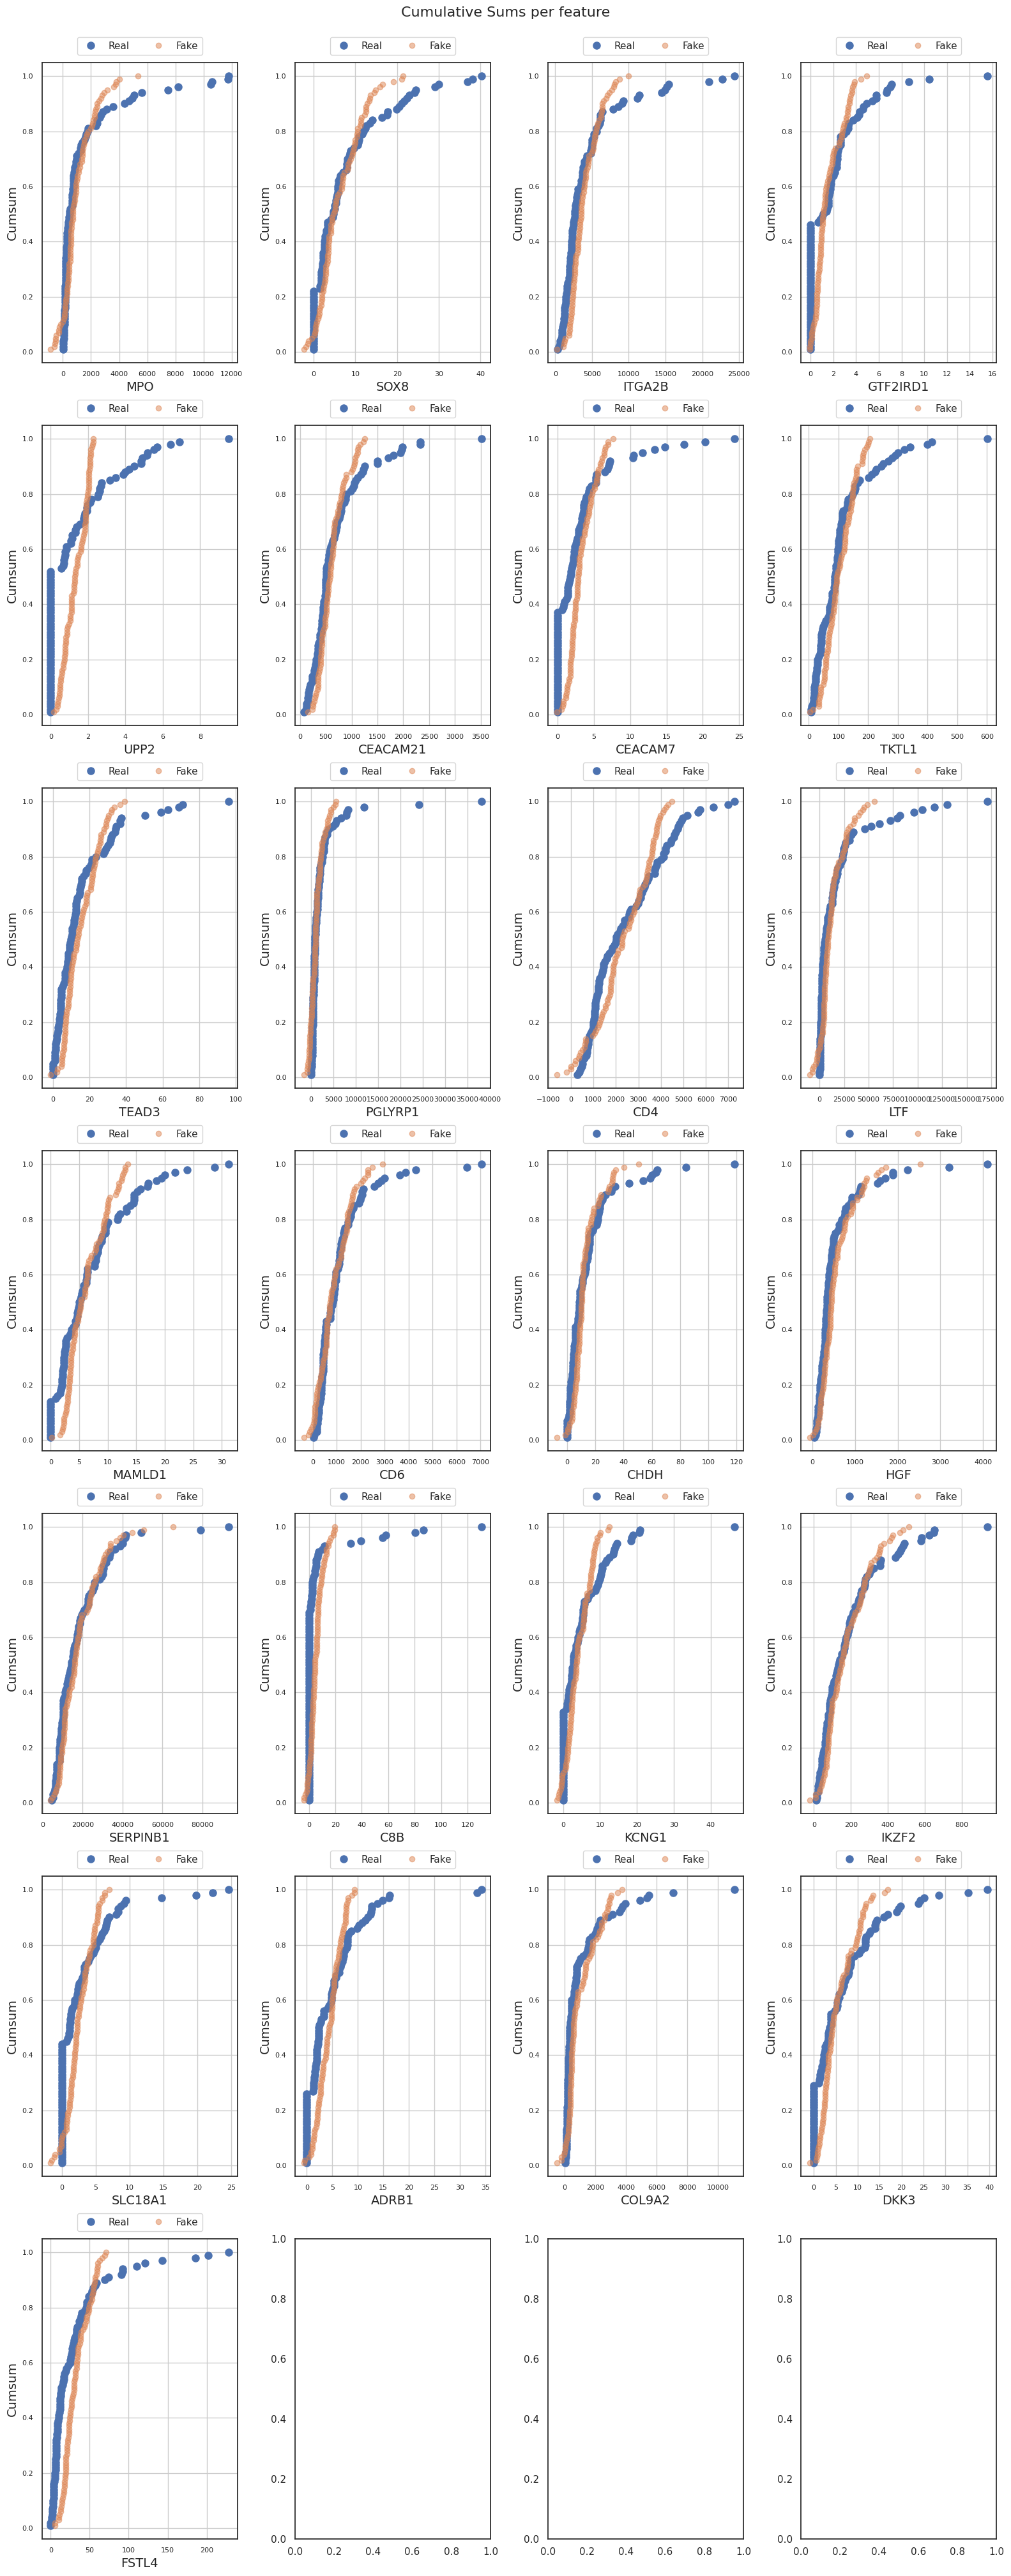

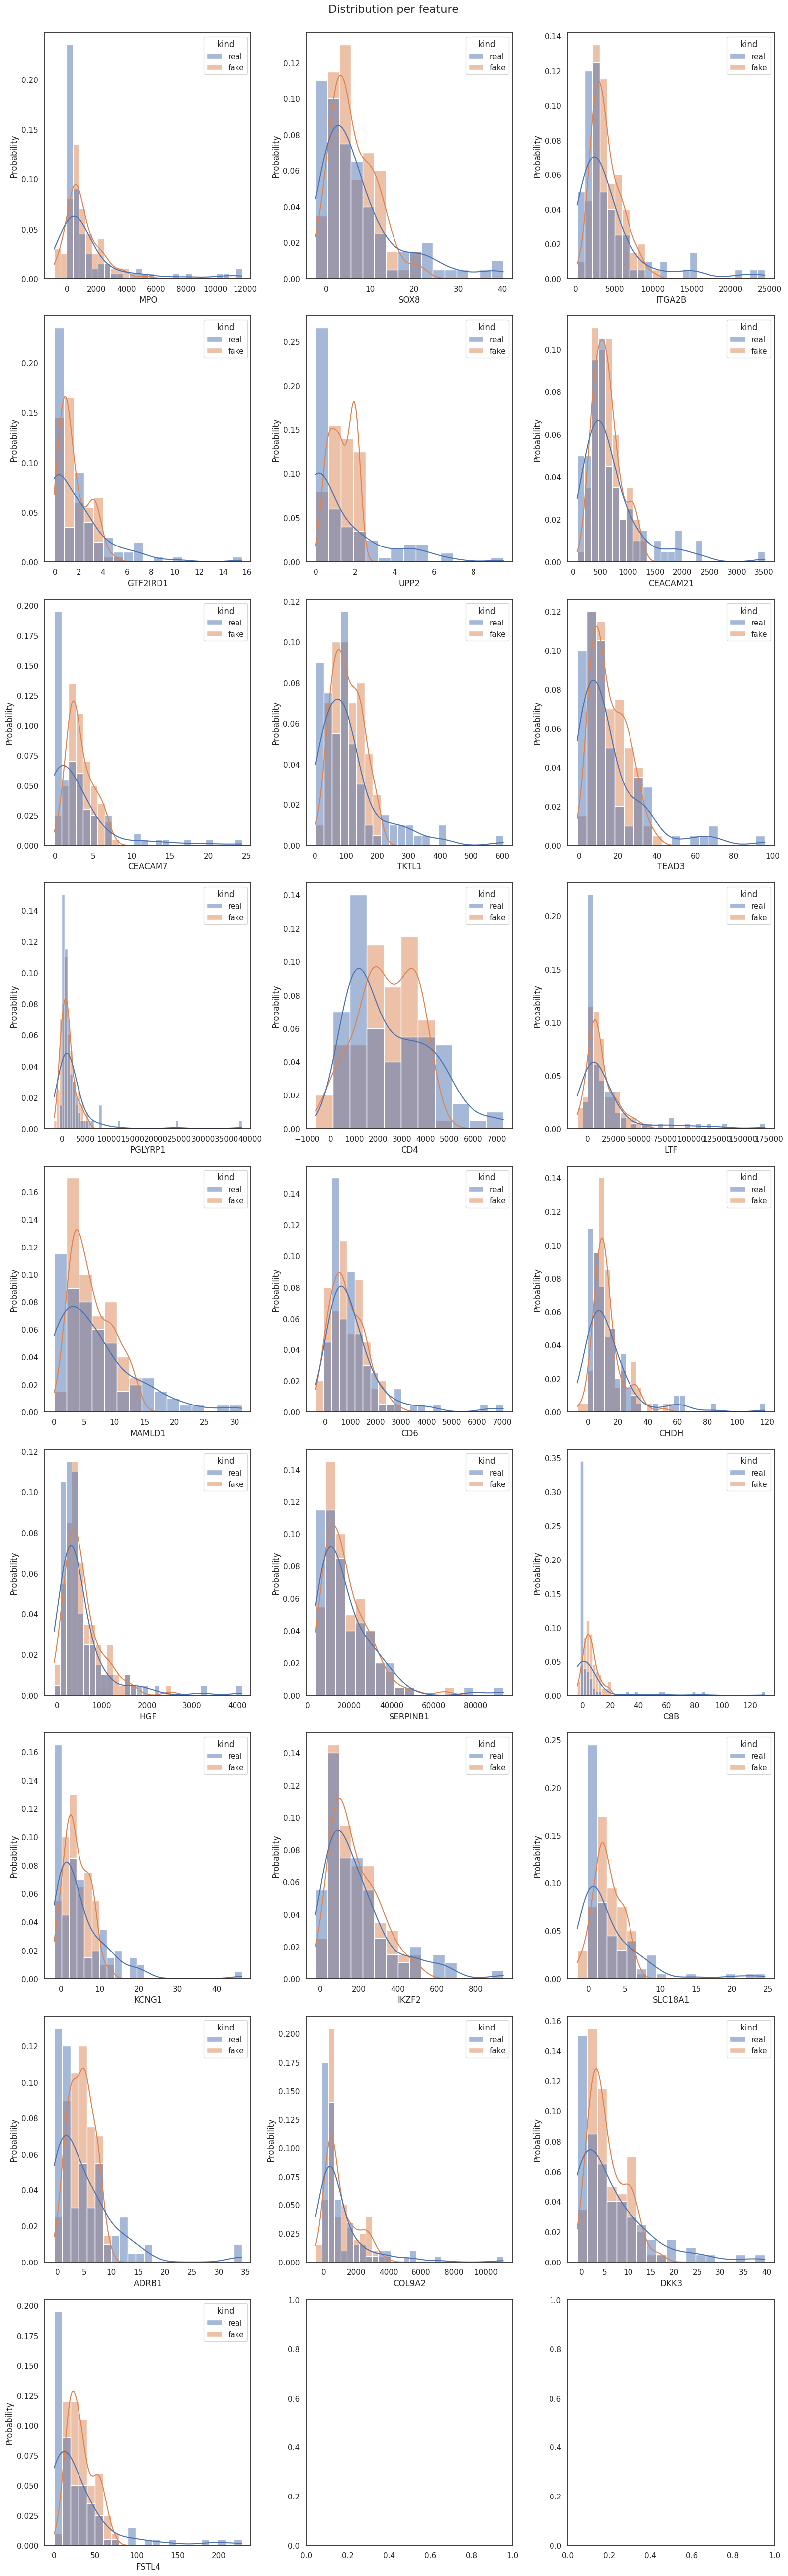

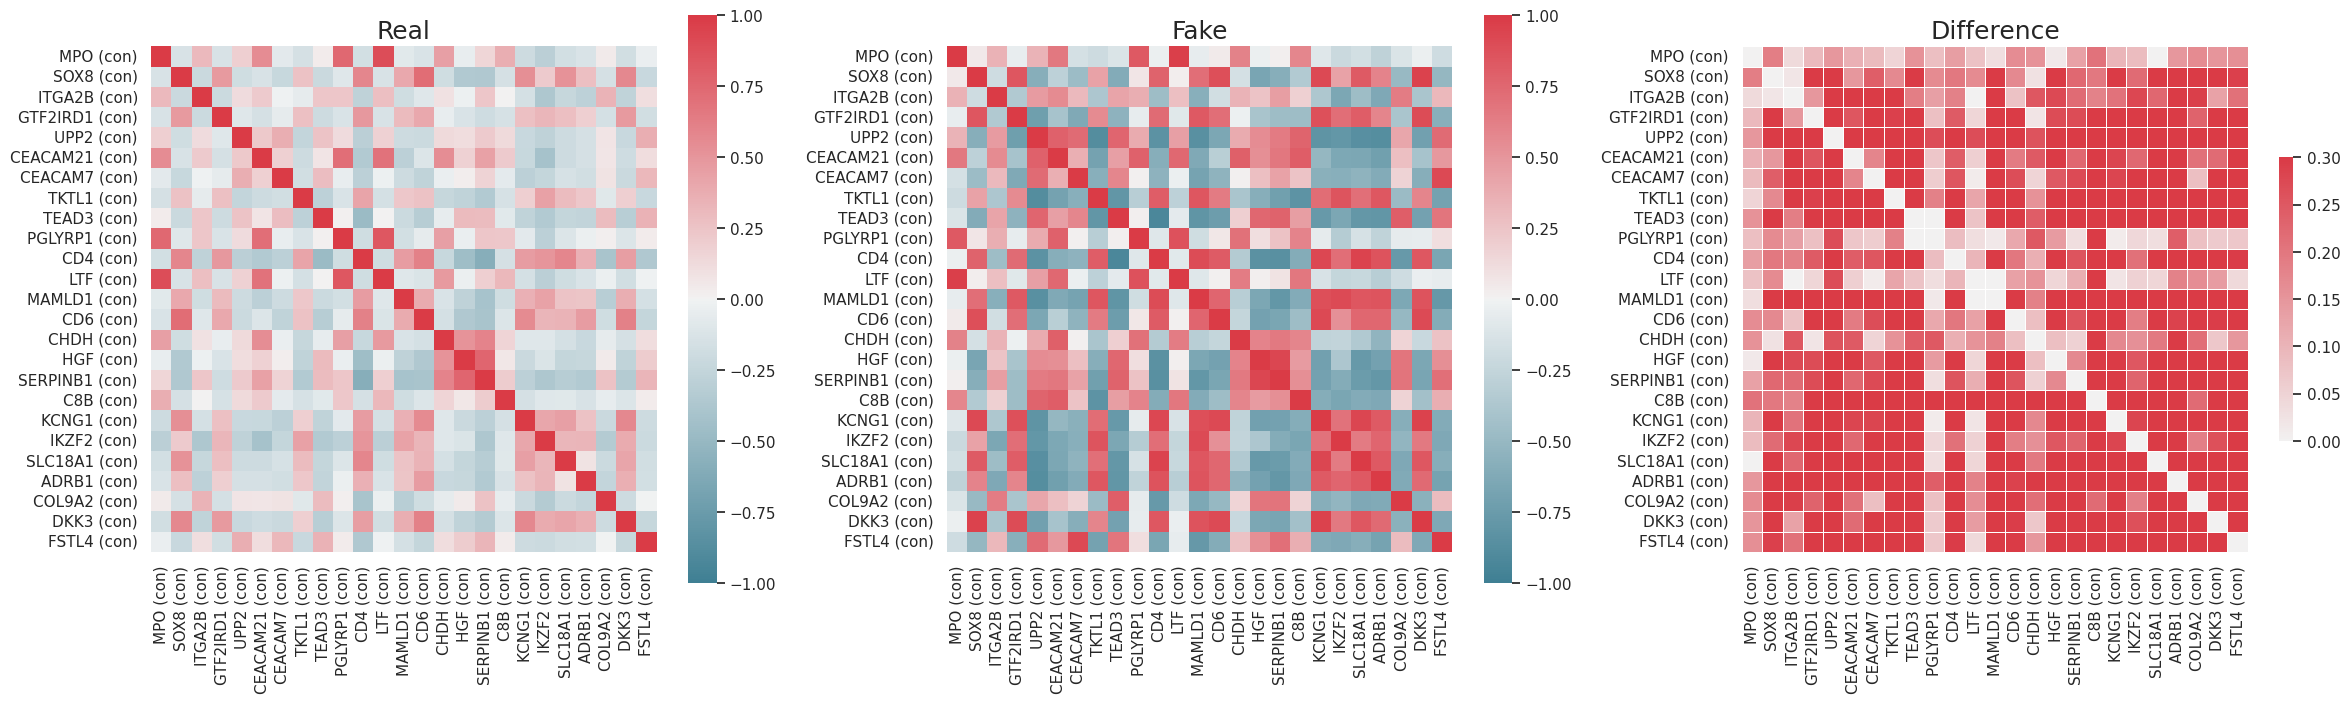

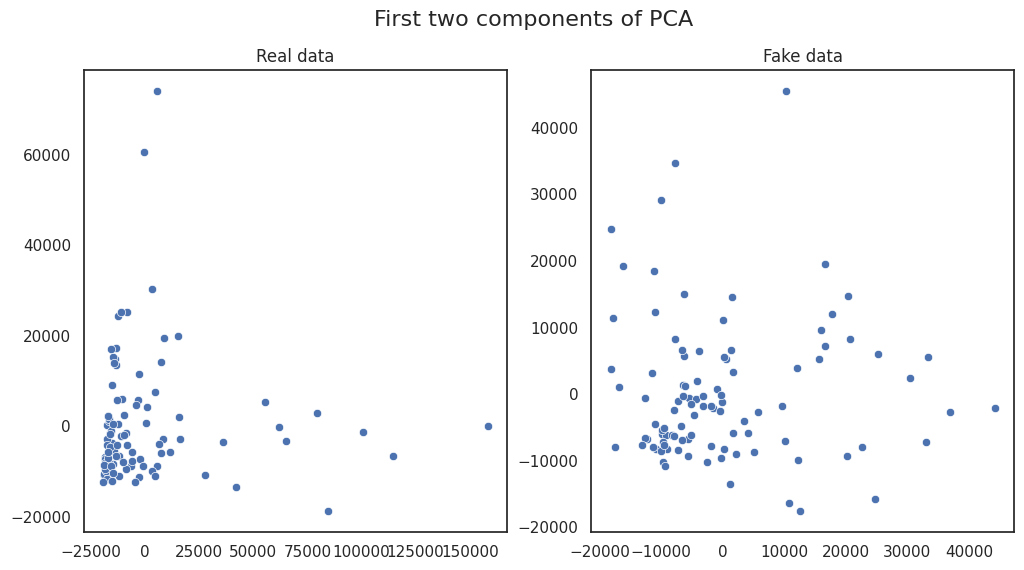

In [ ]:
# Evaluation using table_evaluator
selected_vars = fake.columns[0:25]  #for 25 features

real_subset = real[selected_vars]
fake_subset = fake[selected_vars]


table_evaluator = TableEvaluator(real_subset, fake_subset)
table_evaluator.visual_evaluation()

In [22]:
fake.head()

MPO      SOX8       ITGA2B  GTF2IRD1      UPP2    CEACAM21  \
0   976.666713  1.031168  3858.014210 -0.071605  1.739954  557.560346   
1  1054.016764  5.434441  4939.611506  0.343269  1.587549  628.544126   
2  1058.572782  7.127720  4347.171424  1.409333  1.518649  531.141147   
3   452.712627  2.873710  2644.531669  0.829144  1.357088  478.439156   
4  1147.876928  1.219414  3692.628356  0.277615  1.476607  504.820975   

    CEACAM7       TKTL1      TEAD3     PGLYRP1  ...      FCGBP      CCL4L2  \
0  5.514711   90.046458  12.827448  298.774621  ... -16.440684 -128.243312   
1  4.652855   90.603518  10.698734  723.089954  ...  31.807837  -59.711348   
2  4.564601   79.561014  13.832924  342.511771  ...   7.529078   38.433251   
3  4.355237  135.955684  12.000176   33.766865  ...  22.207071  179.379356   
4  4.516970  118.492965  11.312703  577.597468  ...  -8.502216  -17.029835   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     28.726043      1.529843   8.355918  1.128580  2.192897     7.751700   
1     26.943560      3.775602  11.920037  0.893708  2.152086     8.098886   
2     31.801726      3.372449  42.898946  2.062610  2.106661     8.550409   
3     18.025250      1.795527  19.486226  1.454479  1.396140     4.528483   
4     23.562746      1.907895  11.271331  1.424020  2.053334     7.158690   

   LOC122319436  severity  
0      4.641520       1.0  
1      3.858044       1.0  
2      3.146285       1.0  
3      3.928436       1.0  
4      3.373665       1.0  

[5 rows x 917 columns]

In [23]:
real.head()

MPO       SOX8       ITGA2B  GTF2IRD1  UPP2     CEACAM21   CEACAM7  \
0   660.358182   5.584424  2058.558435  1.396106   0.0   345.536258  1.396106   
1  2329.249354   0.000000  5616.906229  2.363520   0.0   166.628188  0.000000   
2   183.042083   2.331746  1109.911227  2.331746   0.0  1046.954078  6.995239   
3   167.661469  16.409420  2352.968197  0.000000   0.0   130.561910  1.426906   
4    27.954080   0.000000  2206.042830  0.000000   0.0  1055.266528  0.000000   

        TKTL1      TEAD3      PGLYRP1  ...      FCGBP       CCL4L2  \
0   97.727427   1.396106   351.818736  ...  34.204599    30.016281   
1  100.449617   4.727041  1403.931117  ...  66.178571   219.807397   
2   90.938105   9.326985   741.495316  ...  13.990478    32.644448   
3  267.544898   2.853812   191.205421  ...  48.514808  1334.870678   
4   67.555694  12.812287   384.368603  ...  24.459820   100.168787   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     29.318228      1.396106  60.730615  2.094159  1.396106     3.490265   
1      7.090561      3.545281  33.089286  3.545281  7.090561     9.454082   
2     29.146828      0.000000   6.995239  0.000000  0.000000     9.326985   
3      2.853812      8.561437  64.210776  2.140359  0.000000     4.280718   
4     17.471300      2.329507  22.130314  0.000000  0.000000     0.000000   

   LOC122319436  severity  
0      2.094159         1  
1      0.000000         0  
2      1.165873         1  
3      0.000000         0  
4      2.329507         0  

[5 rows x 917 columns]

In [24]:
fake.describe()

MPO        SOX8       ITGA2B    GTF2IRD1        UPP2  \
count   463.000000  463.000000   463.000000  463.000000  463.000000   
mean   1108.058871    6.541540  4128.123764    1.559661    1.313190   
std    1098.457739    5.250785  2117.239181    1.253895    0.613642   
min   -1019.003238   -2.394211   -97.545266   -0.494266   -0.036795   
25%     372.939532    2.747551  2502.001844    0.668112    0.785801   
50%     810.792215    5.291522  3669.661160    1.172303    1.305613   
75%    1619.854223    9.709351  5549.505308    2.007952    1.856684   
max    5701.490936   25.172688  9995.656218    6.057225    2.564710   

          CEACAM21     CEACAM7       TKTL1       TEAD3      PGLYRP1  ...  \
count   463.000000  463.000000  463.000000  463.000000   463.000000  ...   
mean    610.957652    3.135375  104.346713   15.139620  1298.752880  ...   
std     244.992635    1.680759   46.860524    8.941699  1461.687920  ...   
min     149.251668   -0.738626  -13.638472   -1.091460 -1988.932222  ...   
25%     435.063905    1.902323   66.443060    7.982194   262.106423  ...   
50%     580.251475    2.935230  103.519587   13.379071   980.643107  ...   
75%     747.119005    4.274089  141.042297   21.272908  2103.742439  ...   
max    1439.074911    8.420348  225.198058   41.304690  6463.860114  ...   

            FCGBP      CCL4L2  LOC102723475  LOC102723996        NEFL  \
count  463.000000  463.000000    463.000000    463.000000  463.000000   
mean    37.936148  274.575223     34.188546      3.878508   30.994217   
std     39.675285  201.762844     24.204842      1.963380   31.214471   
min    -31.521292 -184.118035     -7.423707     -1.726041  -22.095754   
25%      9.419149  133.999647     15.974007      2.690400   10.610716   
50%     27.313976  244.049905     27.559400      3.770416   20.820944   
75%     55.188808  387.363192     50.362688      4.998002   43.601418   
max    185.934421  874.156069    111.889115     10.588537  153.768372   

            TEX52      PRRT1B  SEPT5.GP1BB  LOC122319436   severity  
count  463.000000  463.000000   463.000000    463.000000  463.00000  
mean     1.712548    1.520147     9.481186      2.218166    0.49676  
std      1.021187    0.800368     5.632121      2.789126    0.50053  
min      0.147699   -0.915503    -5.805503     -3.749827    0.00000  
25%      0.988619    0.926266     5.730870      0.305292    0.00000  
50%      1.383681    1.384779     7.817839      2.003051    0.00000  
75%      2.137101    2.028389    12.069853      4.013608    1.00000  
max      5.445711    4.189096    33.666332     10.939653    1.00000  

[8 rows x 917 columns]

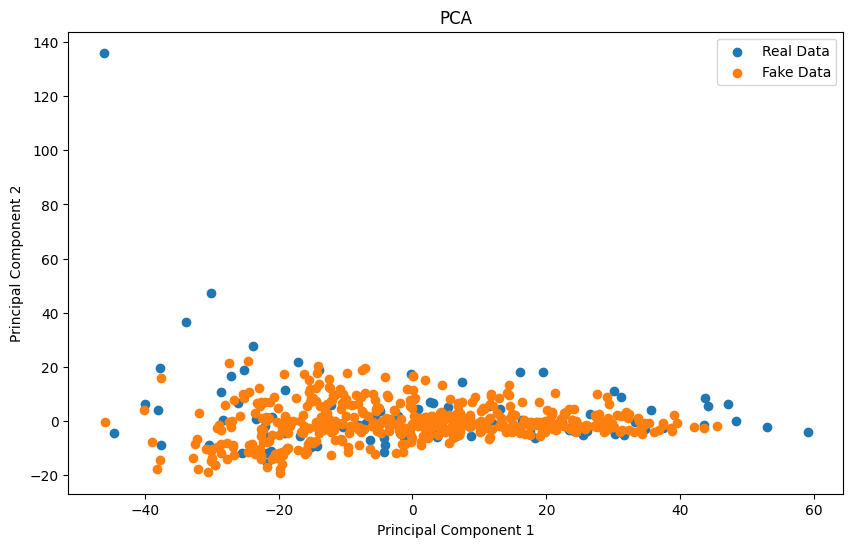

In [25]:
# Concatenate real and fake ddata
combined_data = pd.concat([real, fake], ignore_index=True)
x_scaled = StandardScaler().fit_transform(combined_data)

#  PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

real_pca = pca_result[:len(real)]
fake_pca = pca_result[len(real):]

plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data')
plt.scatter(fake_pca[:, 0], fake_pca[:, 1], label='Fake Data')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


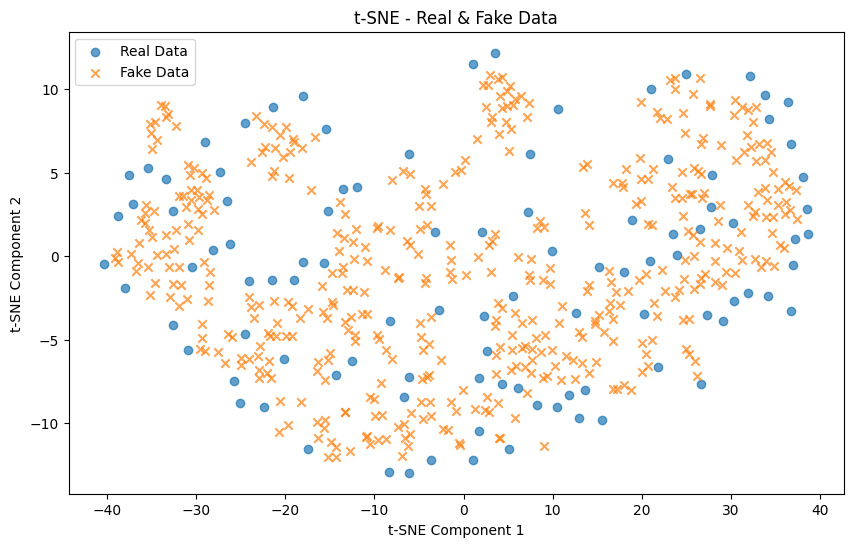

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE  # Import t-SNE from scikit-learn

#see if real and fake data distributions overlap using t-SNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(x_scaled)

real_tsne = tsne_result[:len(real)]
fake_tsne = tsne_result[len(real):]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(real_tsne[:, 0], real_tsne[:, 1], label='Real Data', alpha=0.7, marker='o')
plt.scatter(fake_tsne[:, 0], fake_tsne[:, 1], label='Fake Data', alpha=0.7, marker='x')
plt.title('t-SNE - Real & Fake Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()



In [30]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


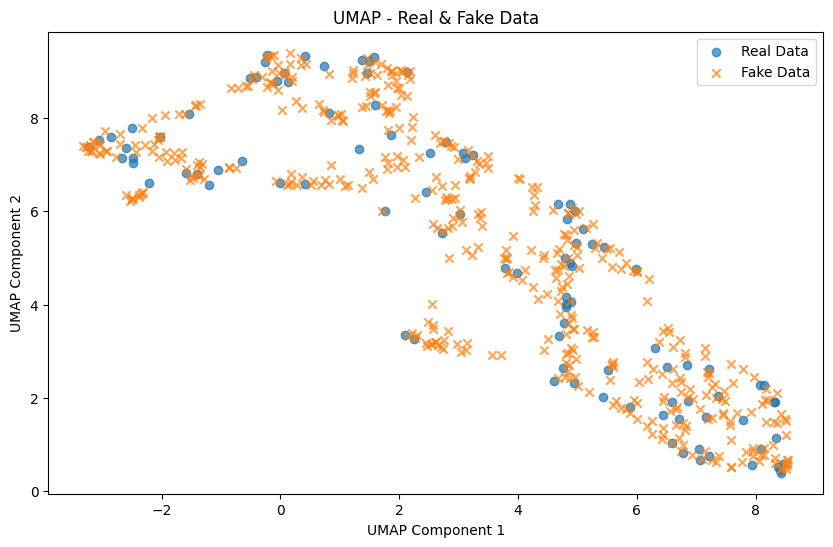

In [32]:
#reimport for independent cell execution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap  # Import UMAP from umap-learn installed package

# Instantiating UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(x_scaled)

# Separate the results into real and fake data
real_umap = umap_result[:len(real)]
fake_umap = umap_result[len(real):]

# Plotting 
plt.figure(figsize=(10, 6))
plt.scatter(real_umap[:, 0], real_umap[:, 1], label='Real Data', alpha=0.7, marker='o')
plt.scatter(fake_umap[:, 0], fake_umap[:, 1], label='Fake Data', alpha=0.7, marker='x')
plt.title('UMAP - Real & Fake Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()


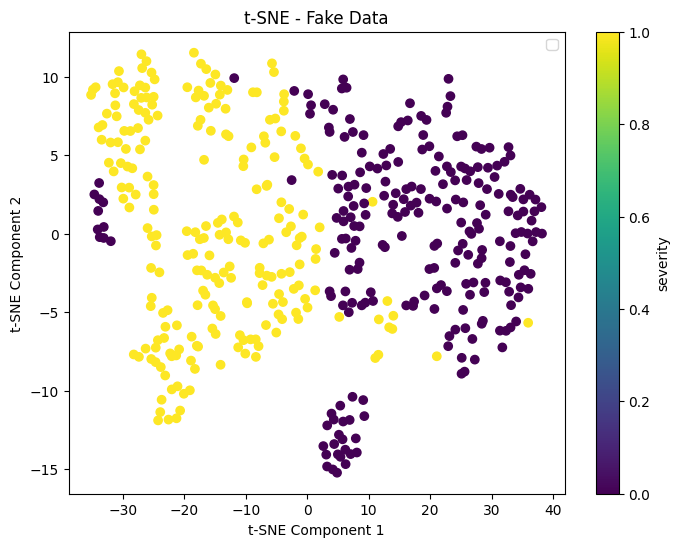

In [33]:

# Select only the fake data for t-SNE
fake_data = fake.copy()  # Copy  to avoid modifying the original data
x_scaled = StandardScaler().fit_transform(fake_data.drop('severity', axis=1))

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(x_scaled)

severity_labels = fake_data['severity']

# t-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=severity_labels, cmap='viridis', label='')
plt.title('t-SNE - Fake Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='severity')
plt.legend()
plt.show()

In [29]:
y_train = combined_data.iloc[:, -1].values
X_train = combined_data.iloc[:, :-1].values

In [39]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# RF classifier
clf_true = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(clf_true, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

y_true_pred_cv = cross_val_predict(clf_true, X_train, y_train, cv=5)  # fit is called implicitly here
print("Cross-Validation classification report:")
print(metrics.classification_report(y_train, y_true_pred_cv))


Cross-Validation Scores: [0.84070796 0.95575221 1.         0.99107143 0.97321429]
Mean Accuracy: 0.9521491782553729
Cross-Validation classification report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       284
         1.0       0.94      0.96      0.95       279

    accuracy                           0.95       563
   macro avg       0.95      0.95      0.95       563
weighted avg       0.95      0.95      0.95       563



In [40]:

# Confusion matrix 
conf_matrix = metrics.confusion_matrix(y_train, y_true_pred_cv)
TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

specificity = TN / (TN + FP)
print("Specificity:", specificity)

Sensitivity: 0.96415770609319
Specificity: 0.9401408450704225


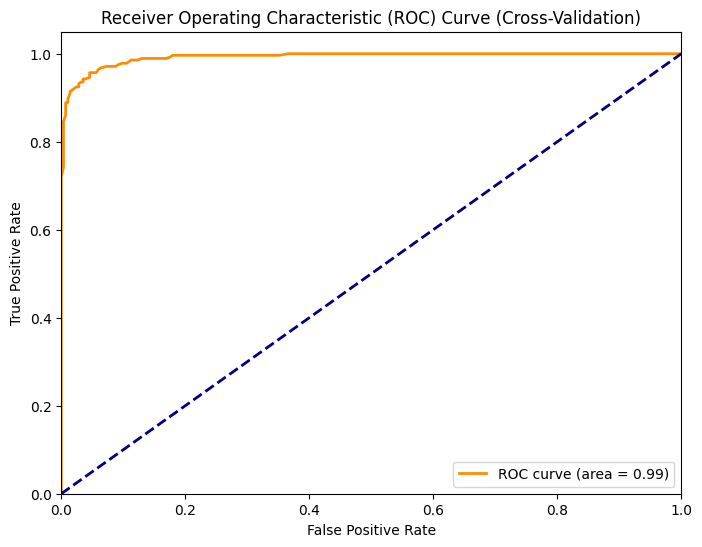

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score


# ROC evaluationn

y_true_prob_cv = cross_val_predict(clf_true, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_train, y_true_prob_cv)

#the AUC calculation
roc_auc_cv = roc_auc_score(y_train, y_true_prob_cv)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation)')
plt.legend(loc="lower right")
plt.show()
